<a href="https://colab.research.google.com/github/selcia25/tsl/blob/main/FYP_train_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv5 Tamil Sign Language Prediction

YOLOv5 is a popular version of the YOLO (You Only Look Once) object detection and image segmentation model, released on November 22, 2022 by Ultralytics. The YOLOv5 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.


## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Thu Jan 16 19:56:56 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Install YOLOv5


In [ ]:
# clone YOLOv5 repository
%cd /content
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 17265 (delta 46), reused 10 (delta 10), pack-reused 17173 (from 5)
Receiving objects: 100% (17265/17265), 16.00 MiB | 18.43 MiB/s, done.
Resolving deltas: 100% (11791/11791), done.


In [ ]:
# install dependencies as necessary
!pip install -r requirements.txt
!pip uninstall wandb -qy  # deprecated dependency
import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Setup complete. Using torch 2.5.1+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40, uuid=b28a58dc-a702-4b75-d263-0b0637477b6b, L2_cache_size=4MB)


In [ ]:
%cd /content/yolov5
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Awfsxtk5OsUIpnuHP03u")
project = rf.workspace("signlanguage-mrsyj").project("signlanguageprediction")
version = project.version(2)
dataset = version.download("yolov5")

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SignLanguagePrediction-2 in yolov5pytorch:: 100%|██████████| 4482/4482 [00:00<00:00, 6536.30it/s]


# Train Custom YOLOv5 Detector

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J))
- **name:** result names
- **cache:** cache images for faster training

In [ ]:
# train yolov5s on custom data for 50 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py \
  --img 416 \
  --batch 16 \
  --epochs 50 \
  --data {dataset.location}/data.yaml \
  --weights yolov5s.pt \
  --name yolov5s_results  \
  --cache

Streaming output truncated to the last 5000 lines.
      30/49      1.99G    0.02917   0.008204     0.0101         27        416:  17% 21/123 [00:05<00:20,  4.96it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      30/49      1.99G    0.02934   0.008267     0.0107         28        416:  18% 22/123 [00:05<00:18,  5.43it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      30/49      1.99G    0.02927   0.008281    0.01092         22        416:  19% 23/123 [00:05<00:20,  4.78it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      30/49      1.99G     0.0293 

# Evaluate Custom YOLOv5 Detector Performance

You can view the training graphs associated with a training job in the `/content/yolov5/runs/train/yolov5s_results/results.png` folder.

Training losses and performance metrics are also saved to Tensorboard and also to a logfile defined above with the **--name** flag when we train. In our case, we named this `yolov5s_results`.

Note from Glenn: Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`.

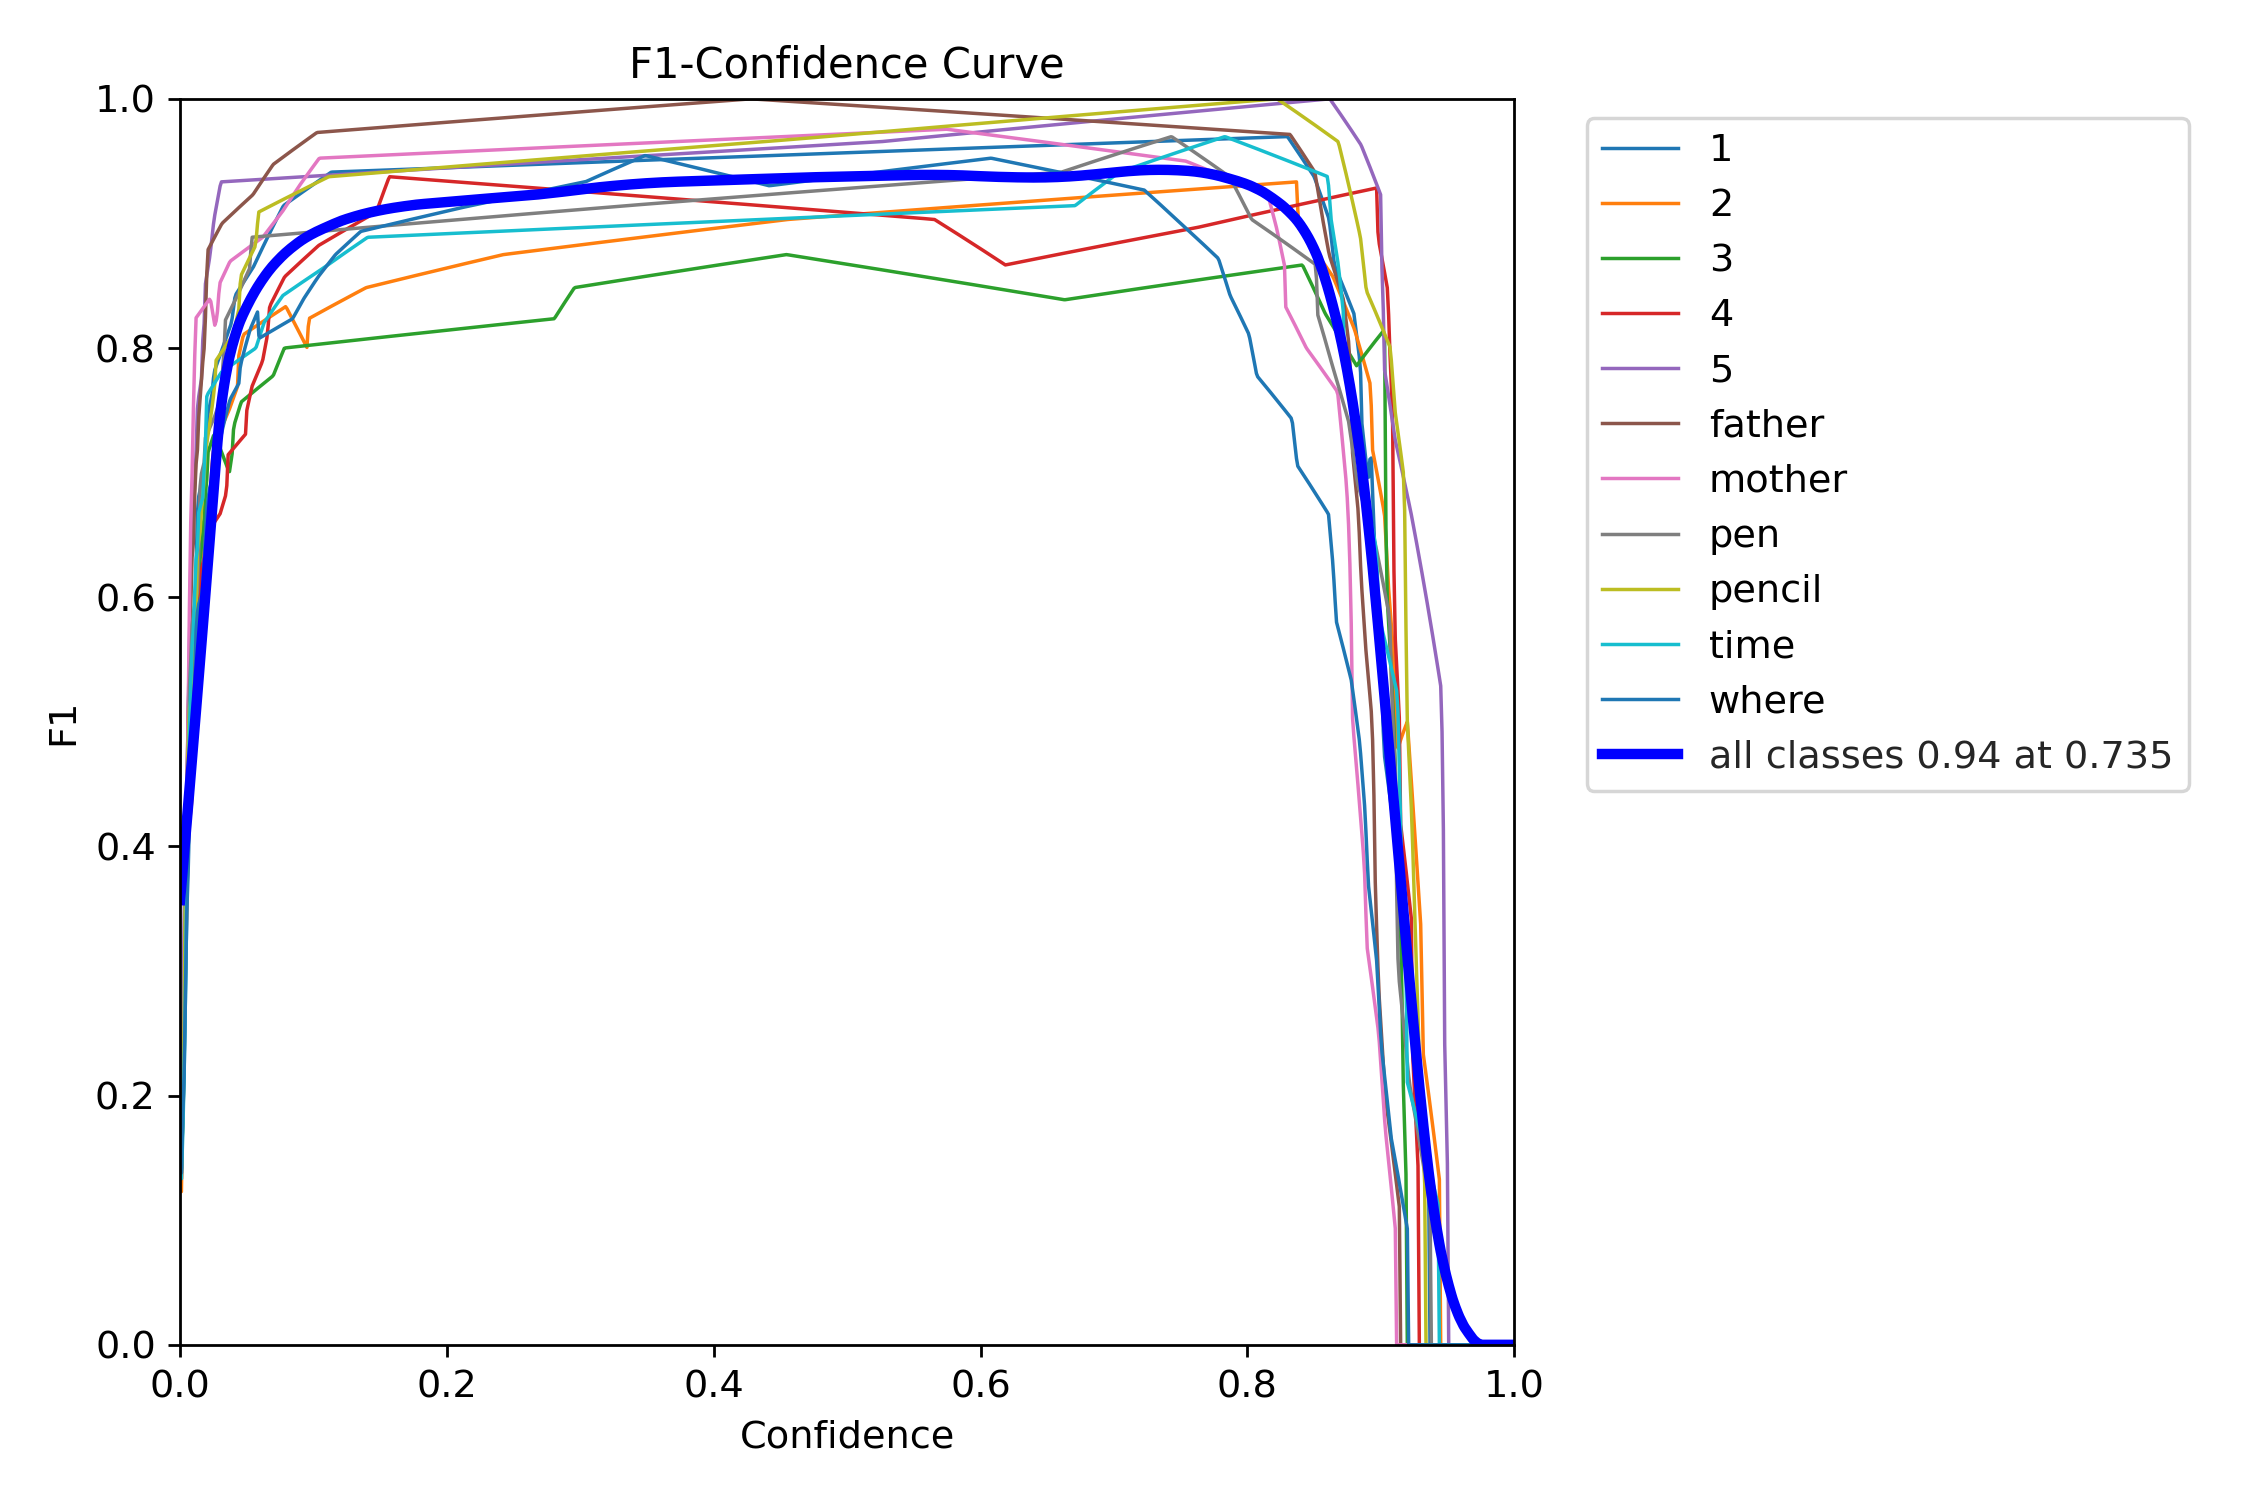

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/F1_curve.png', width=1000)

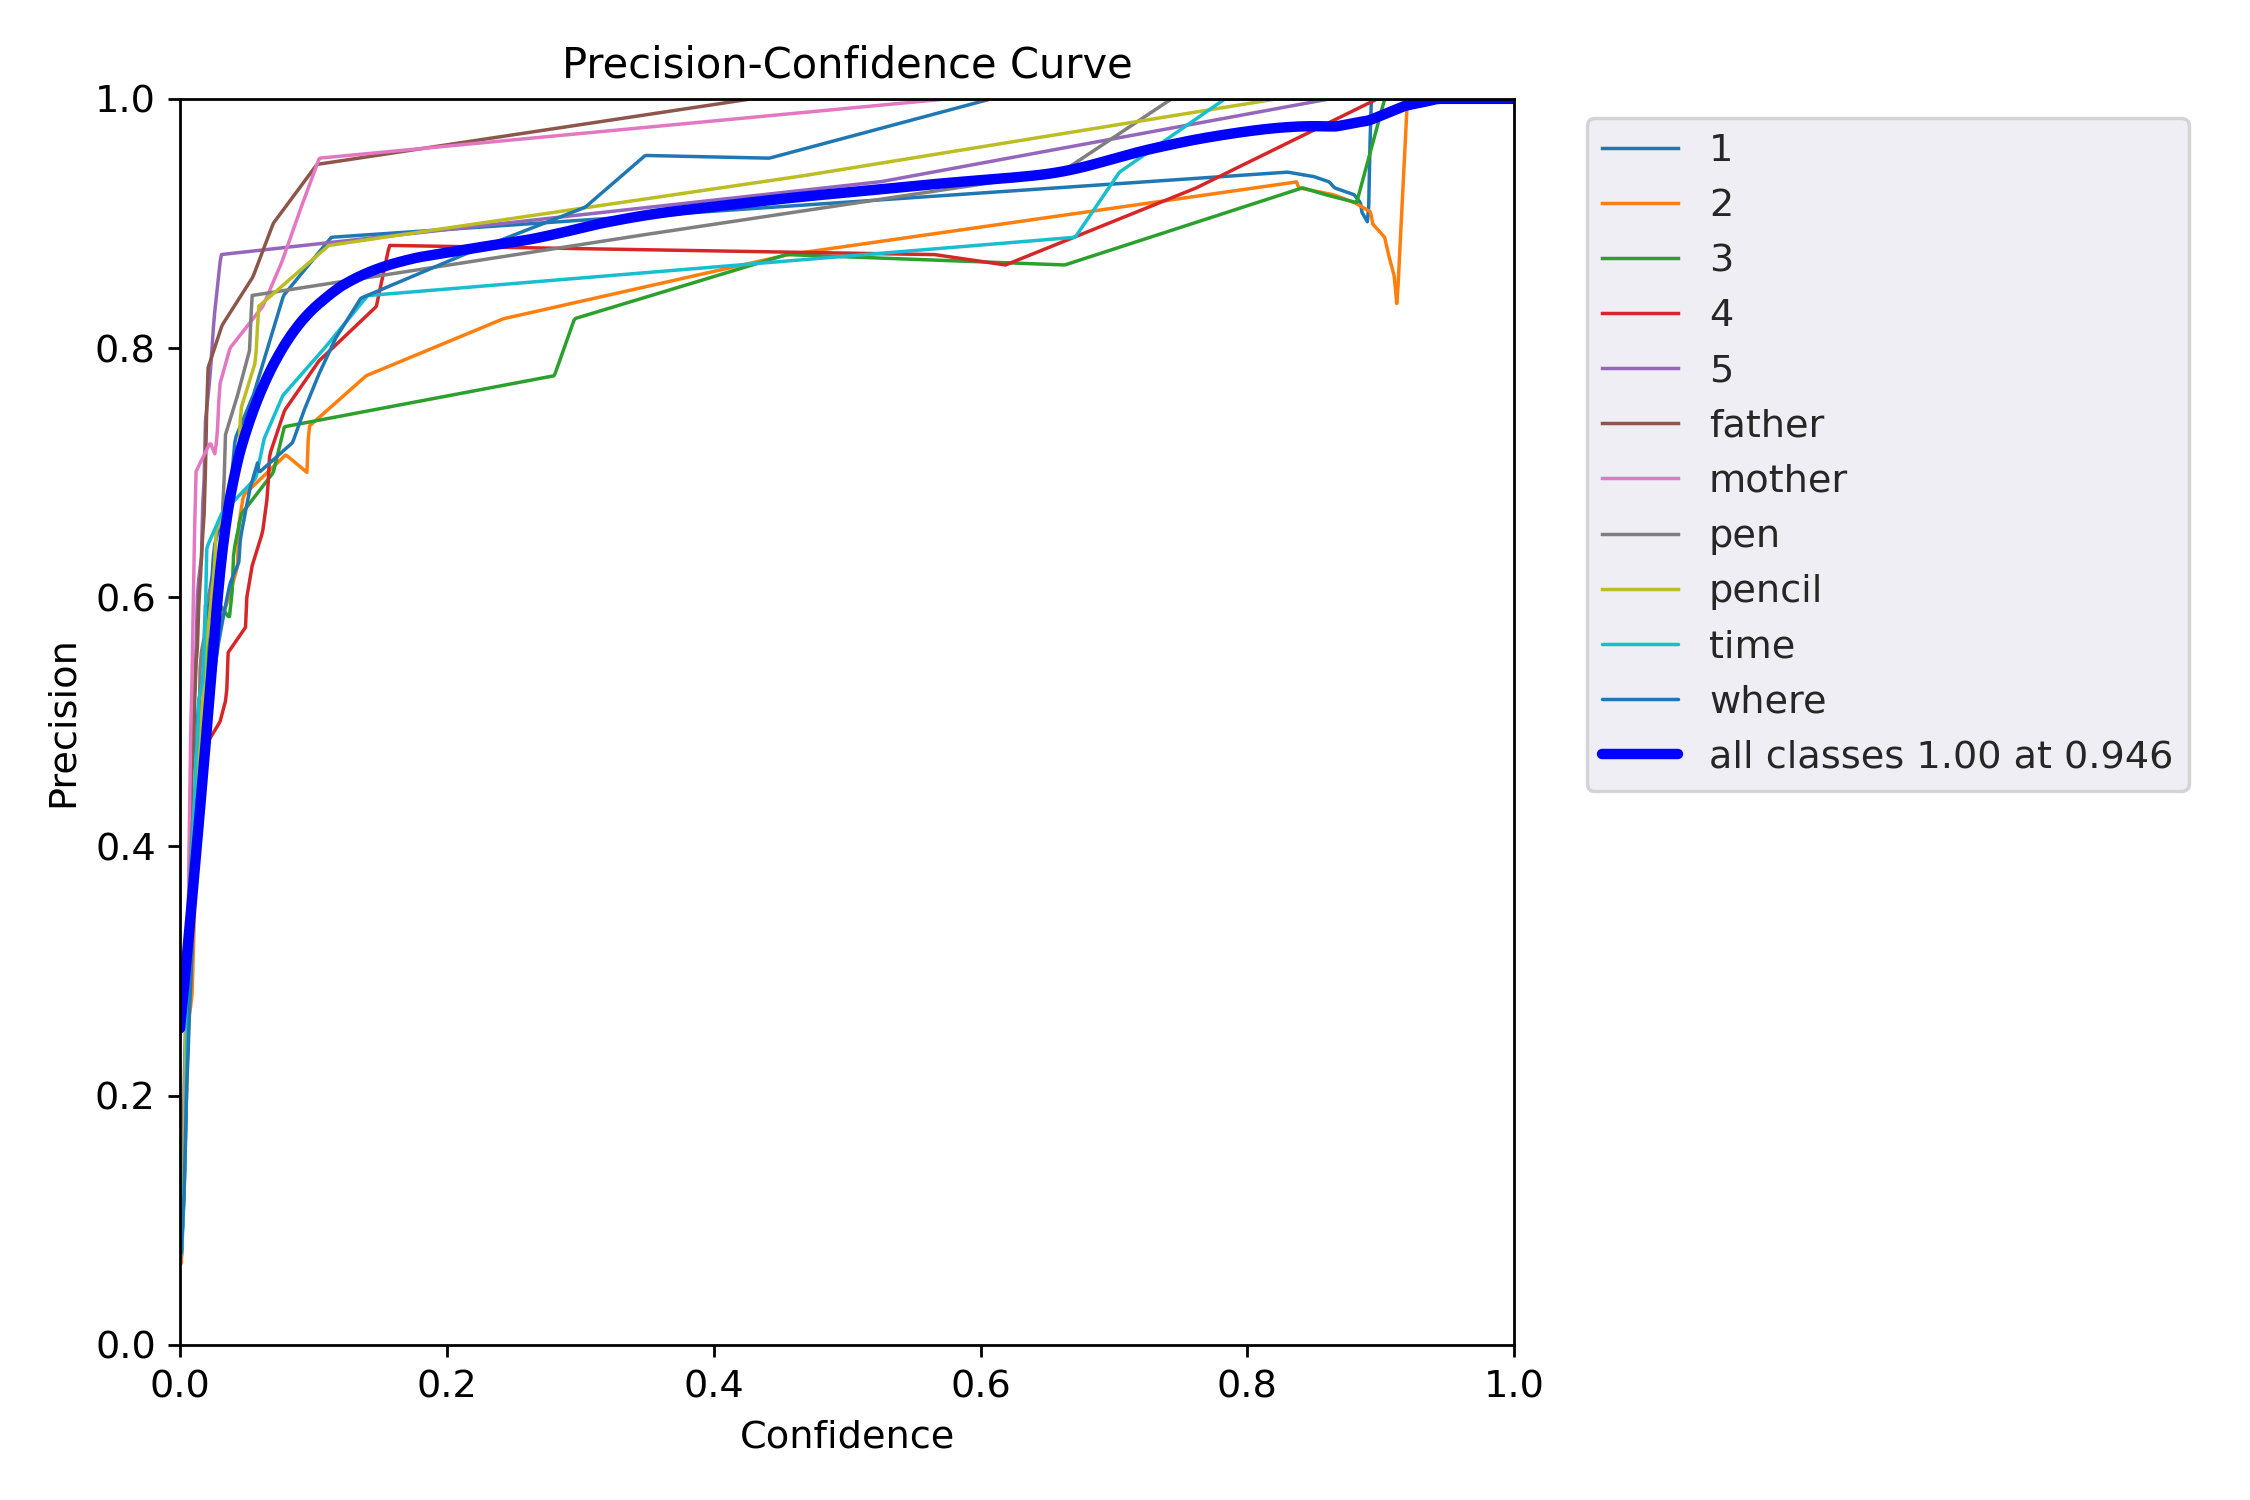

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/P_curve.png', width=1000)

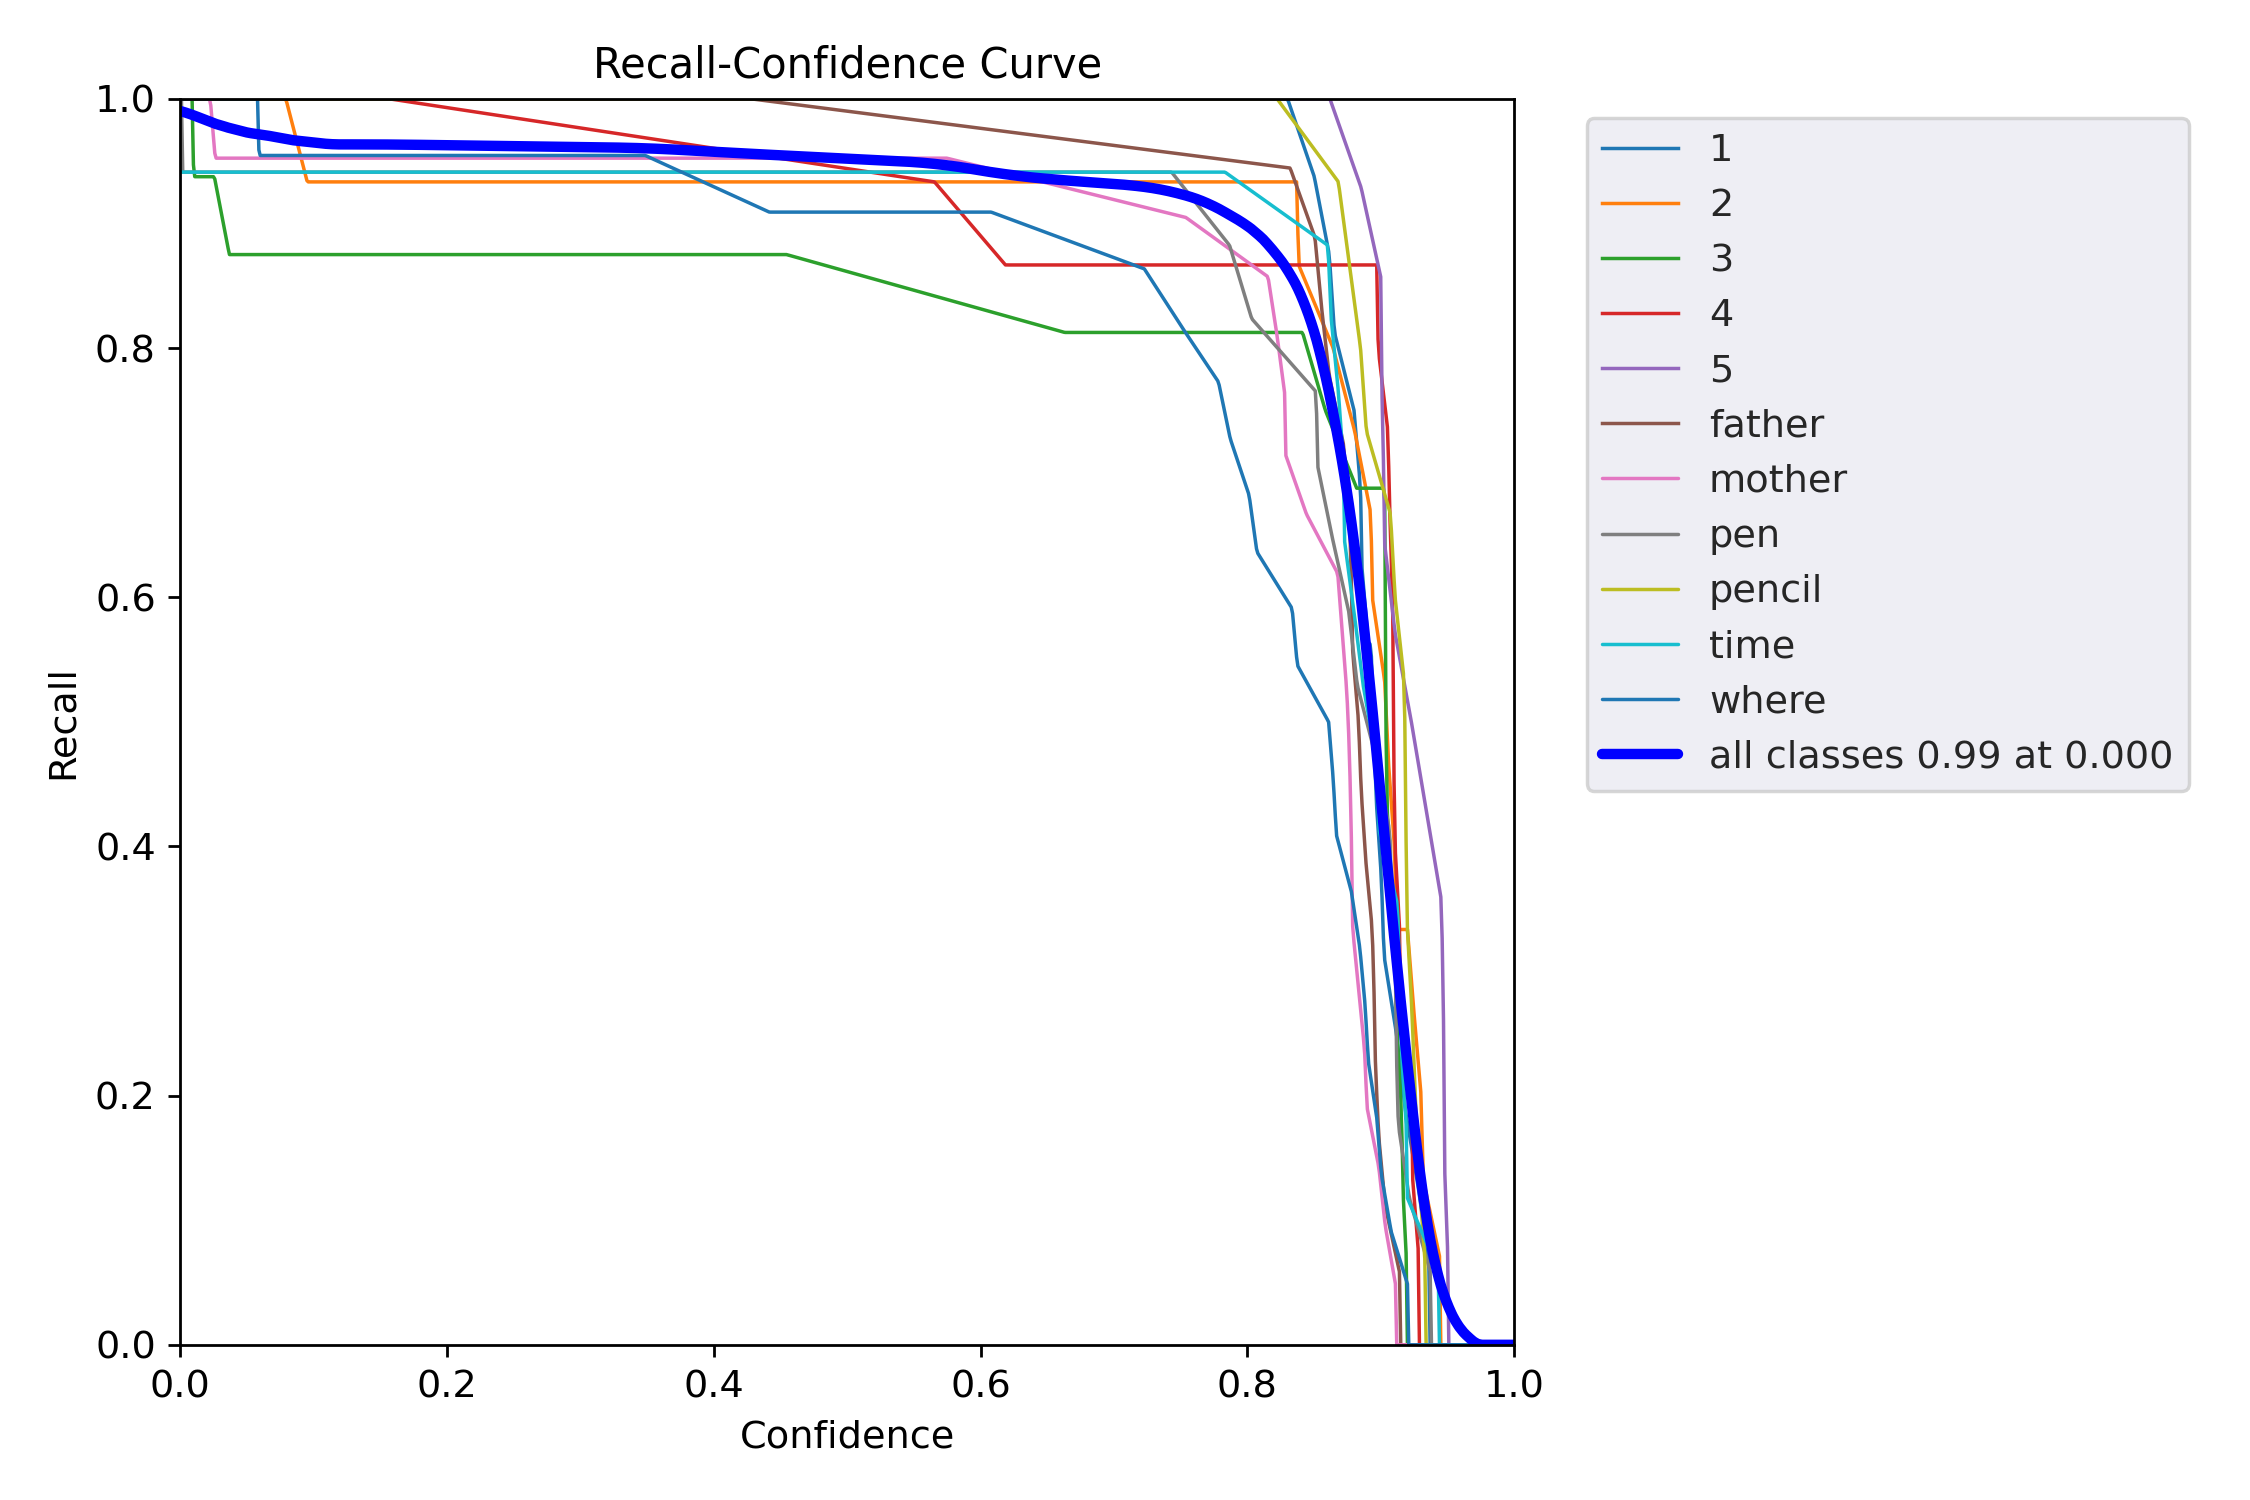

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/R_curve.png', width=1000)

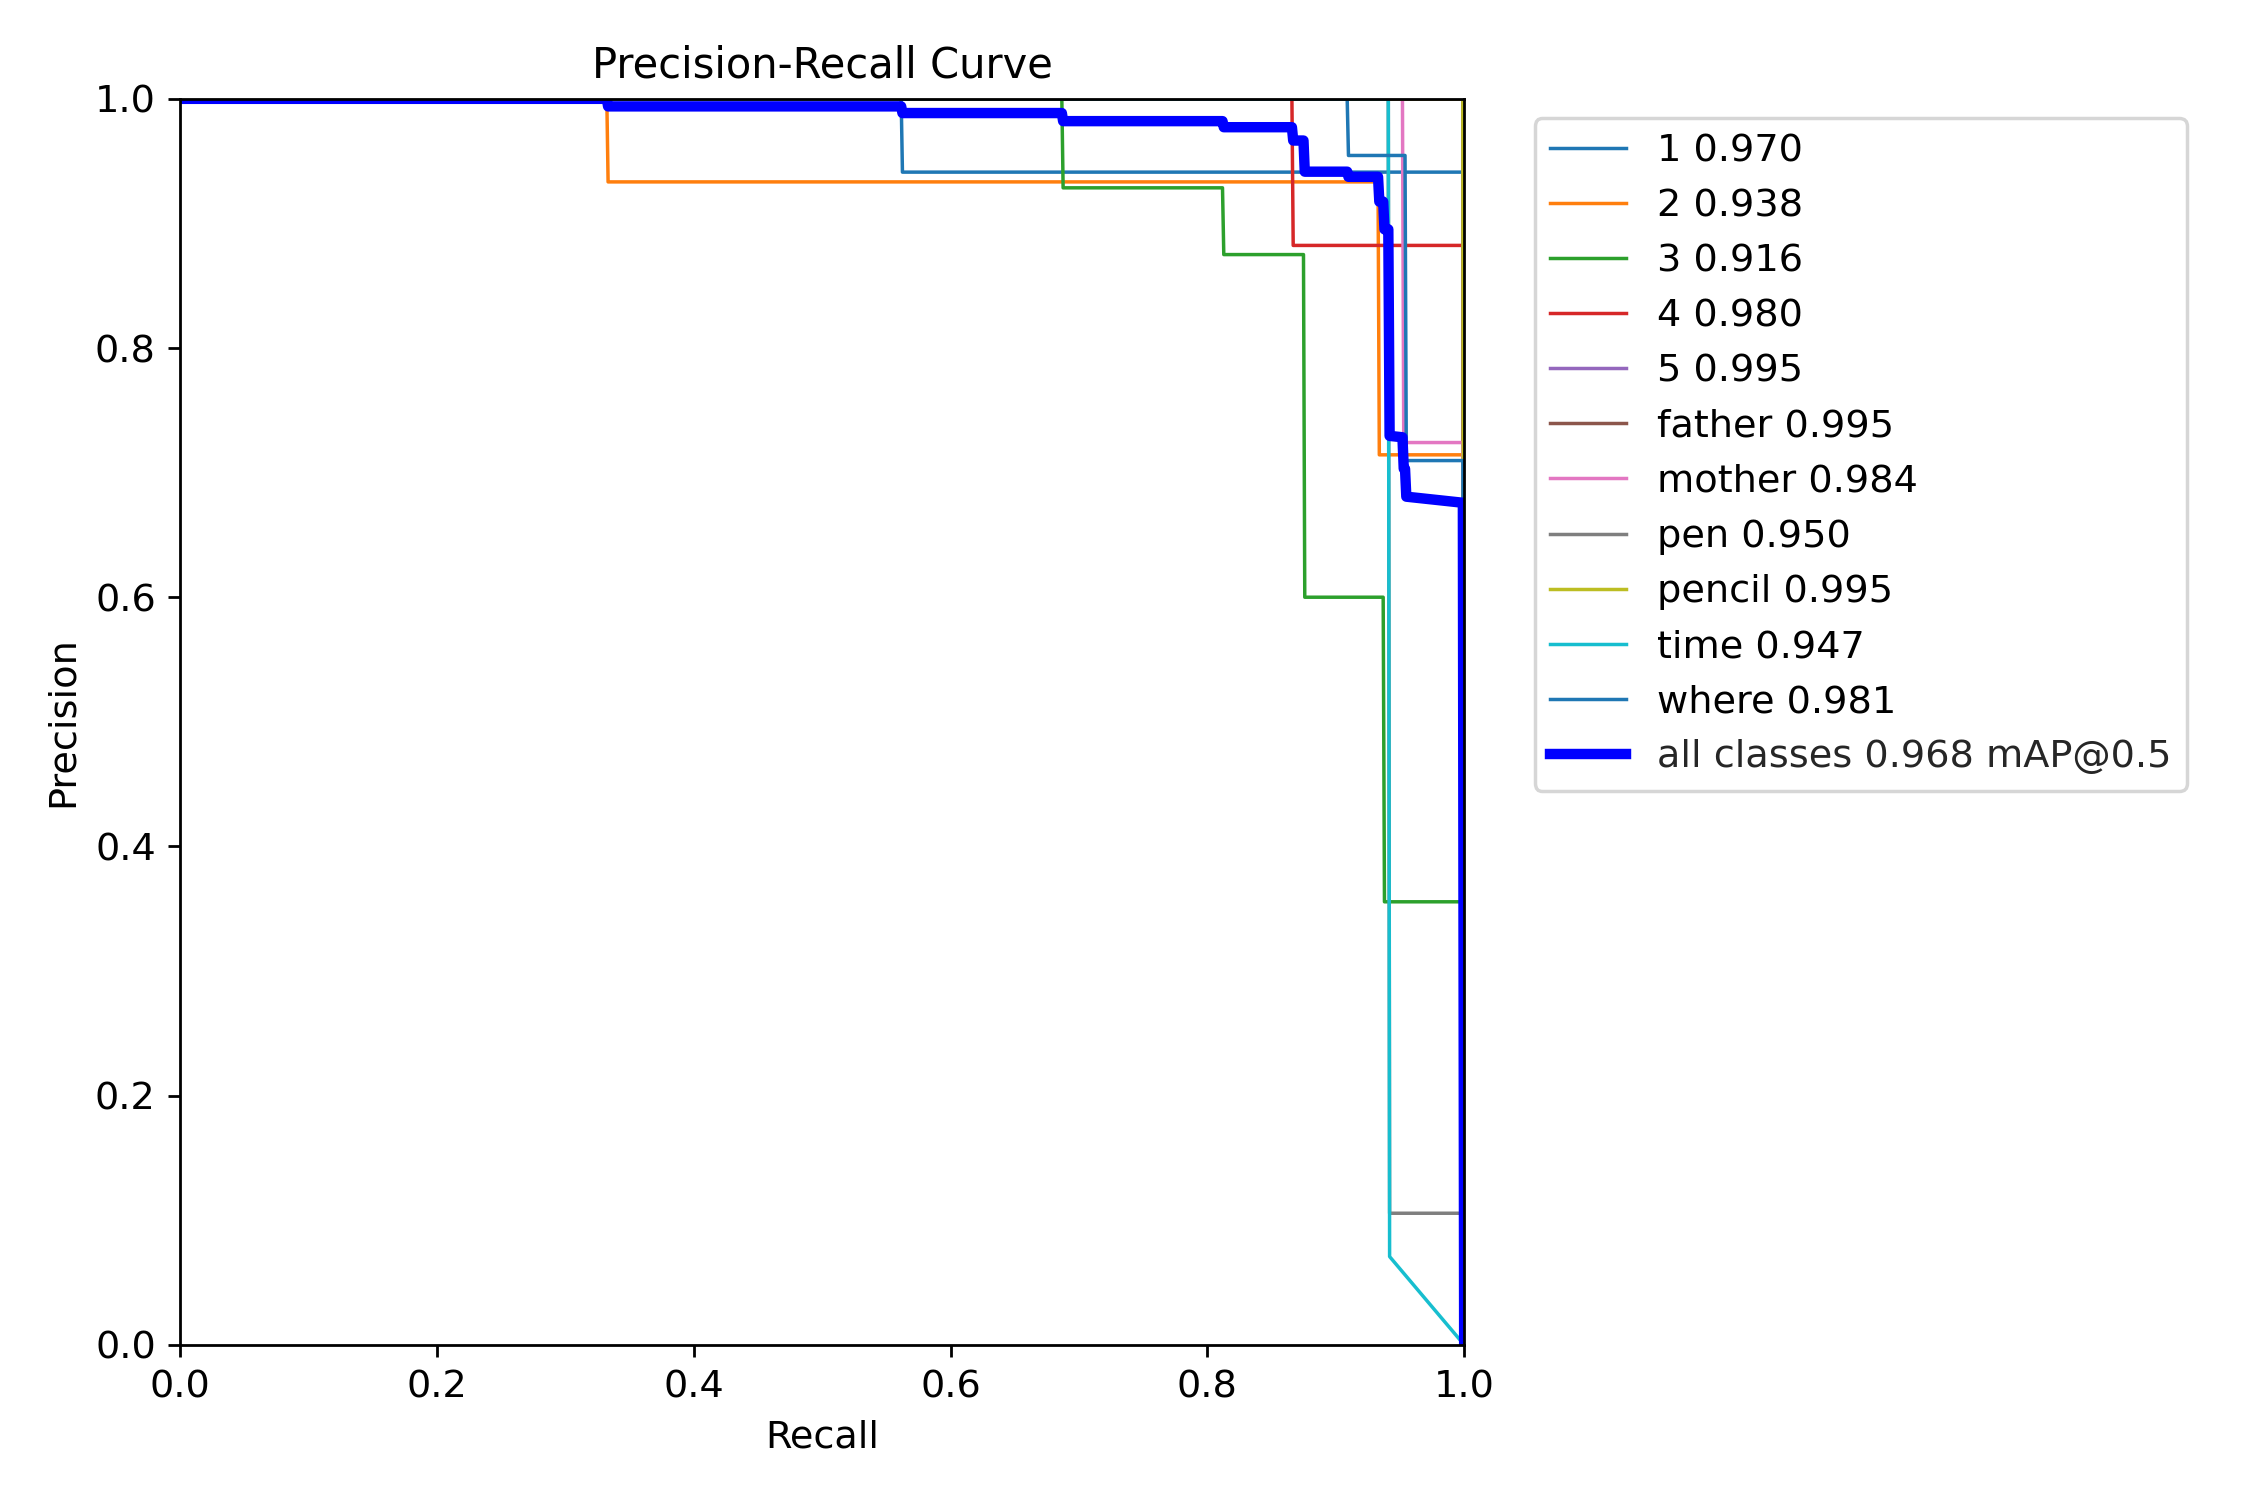

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/PR_curve.png', width=1000)

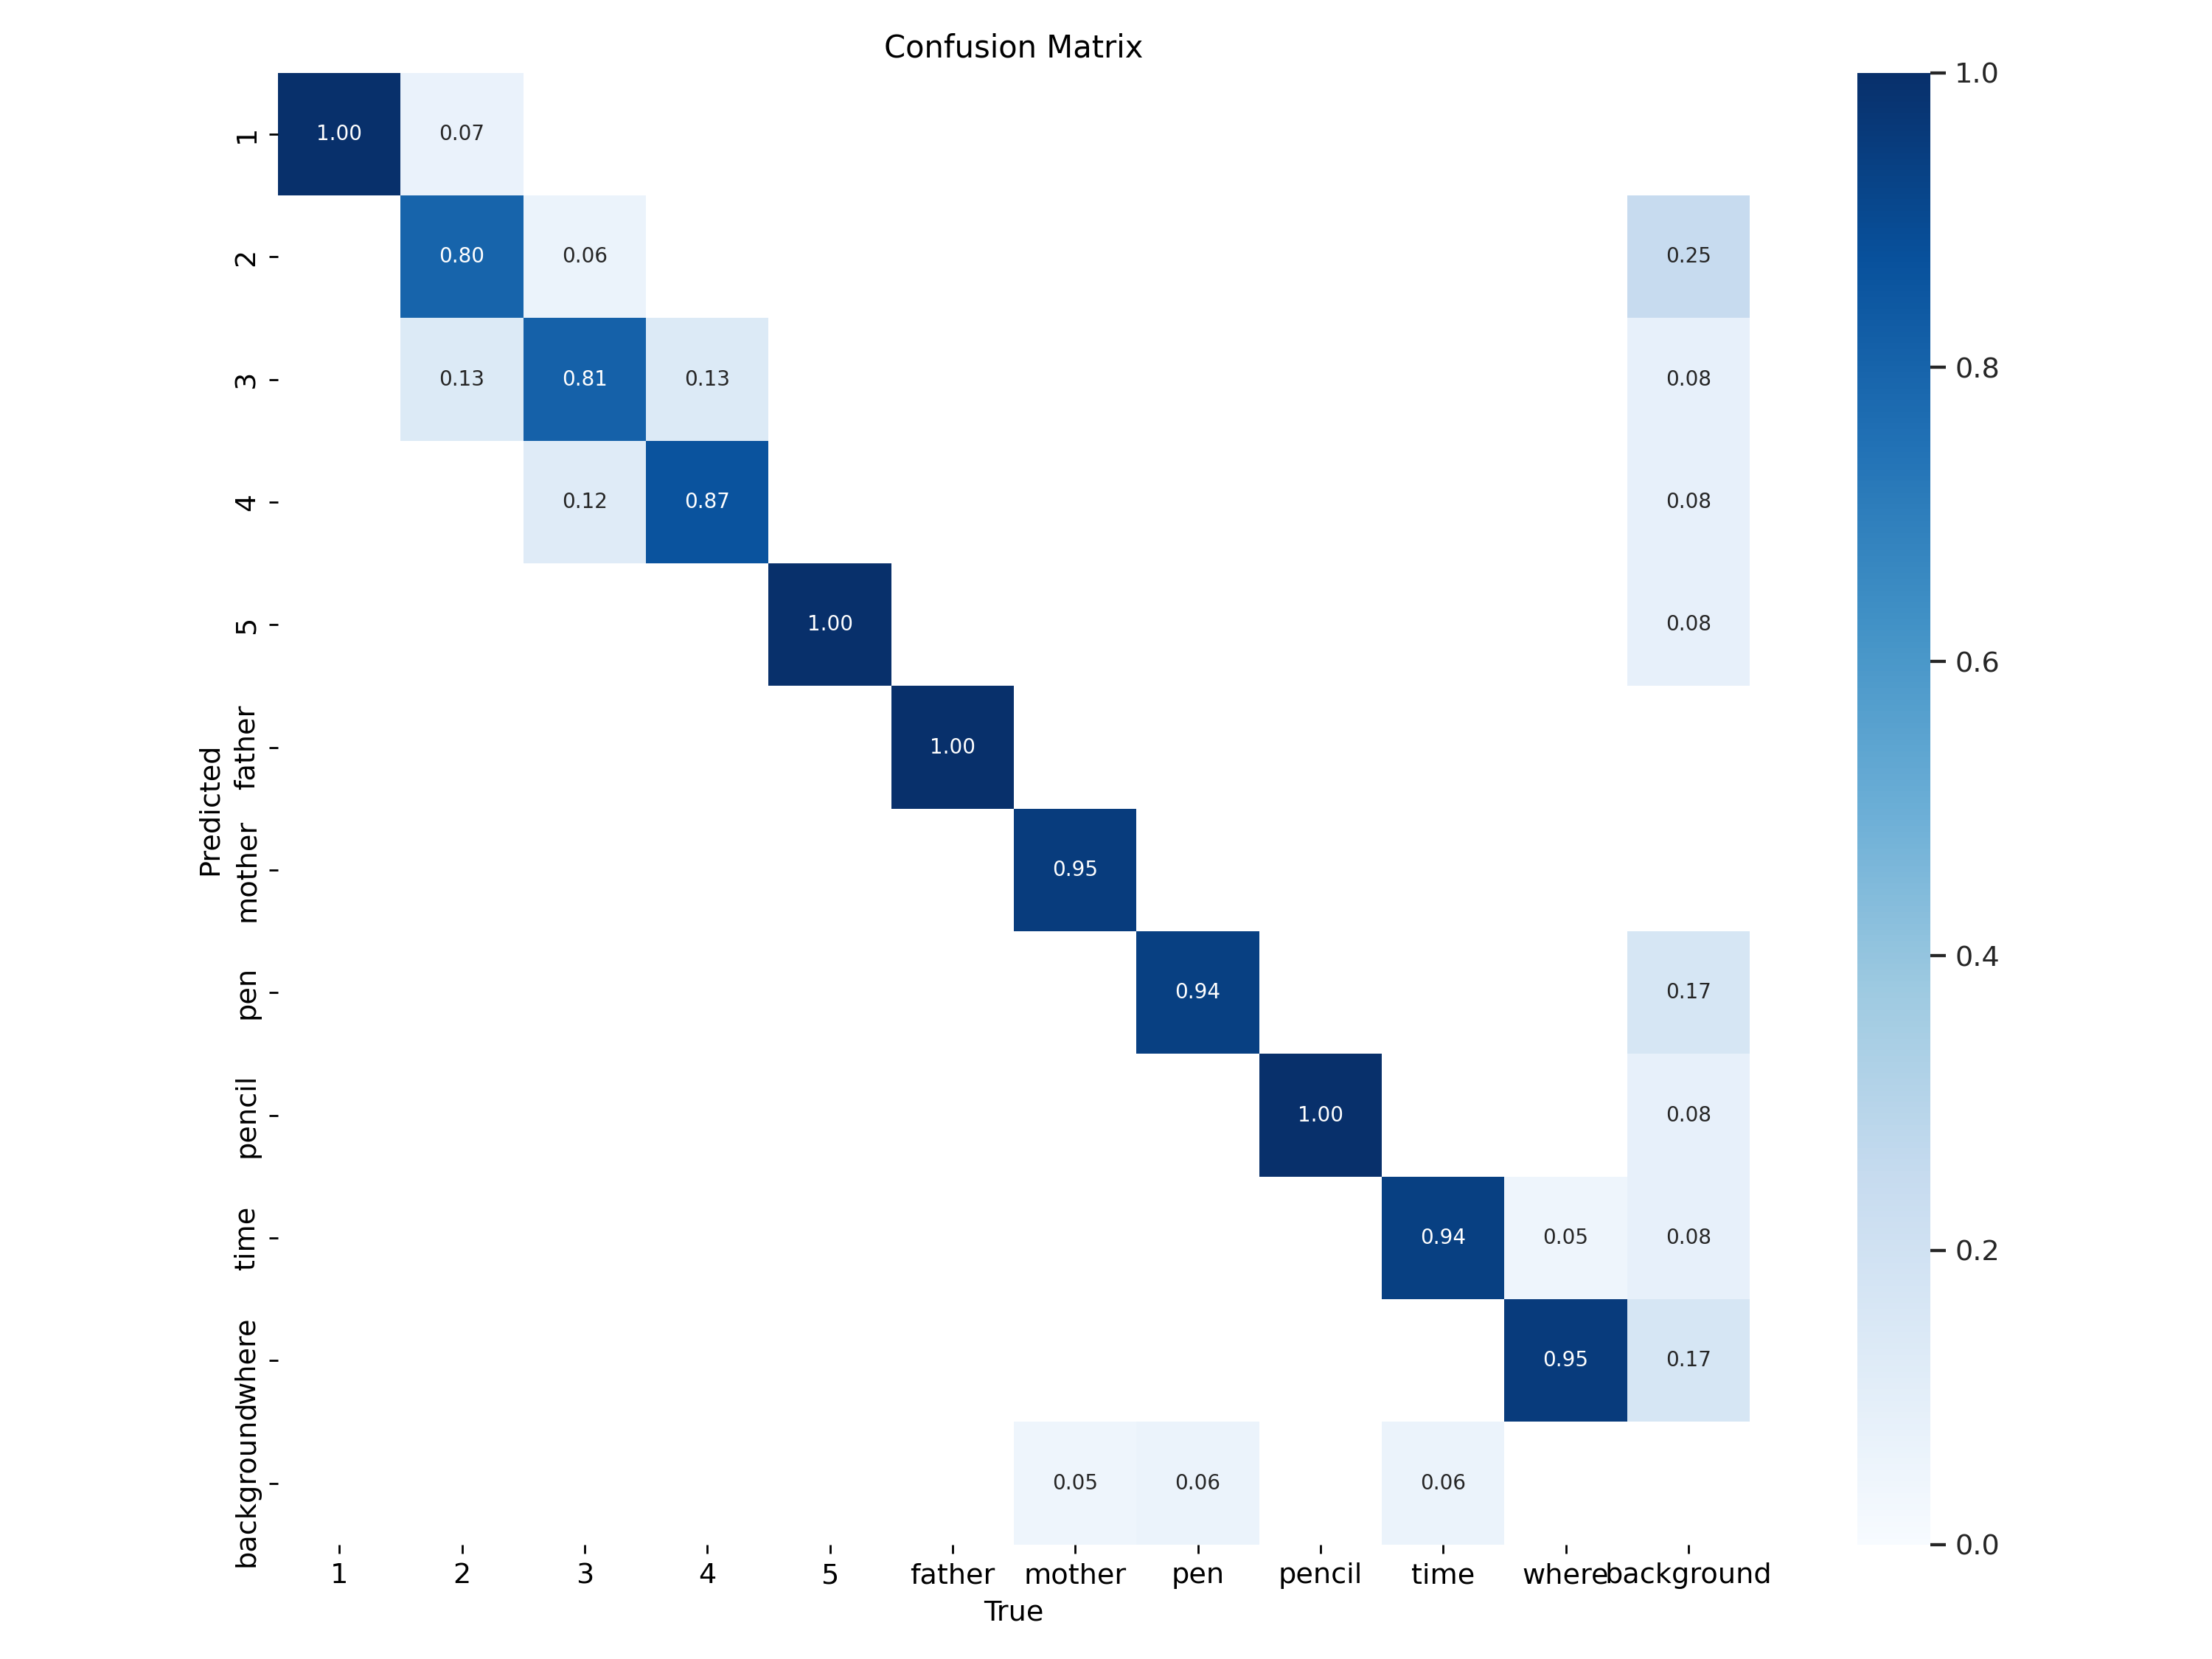

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/confusion_matrix.png', width=1000)

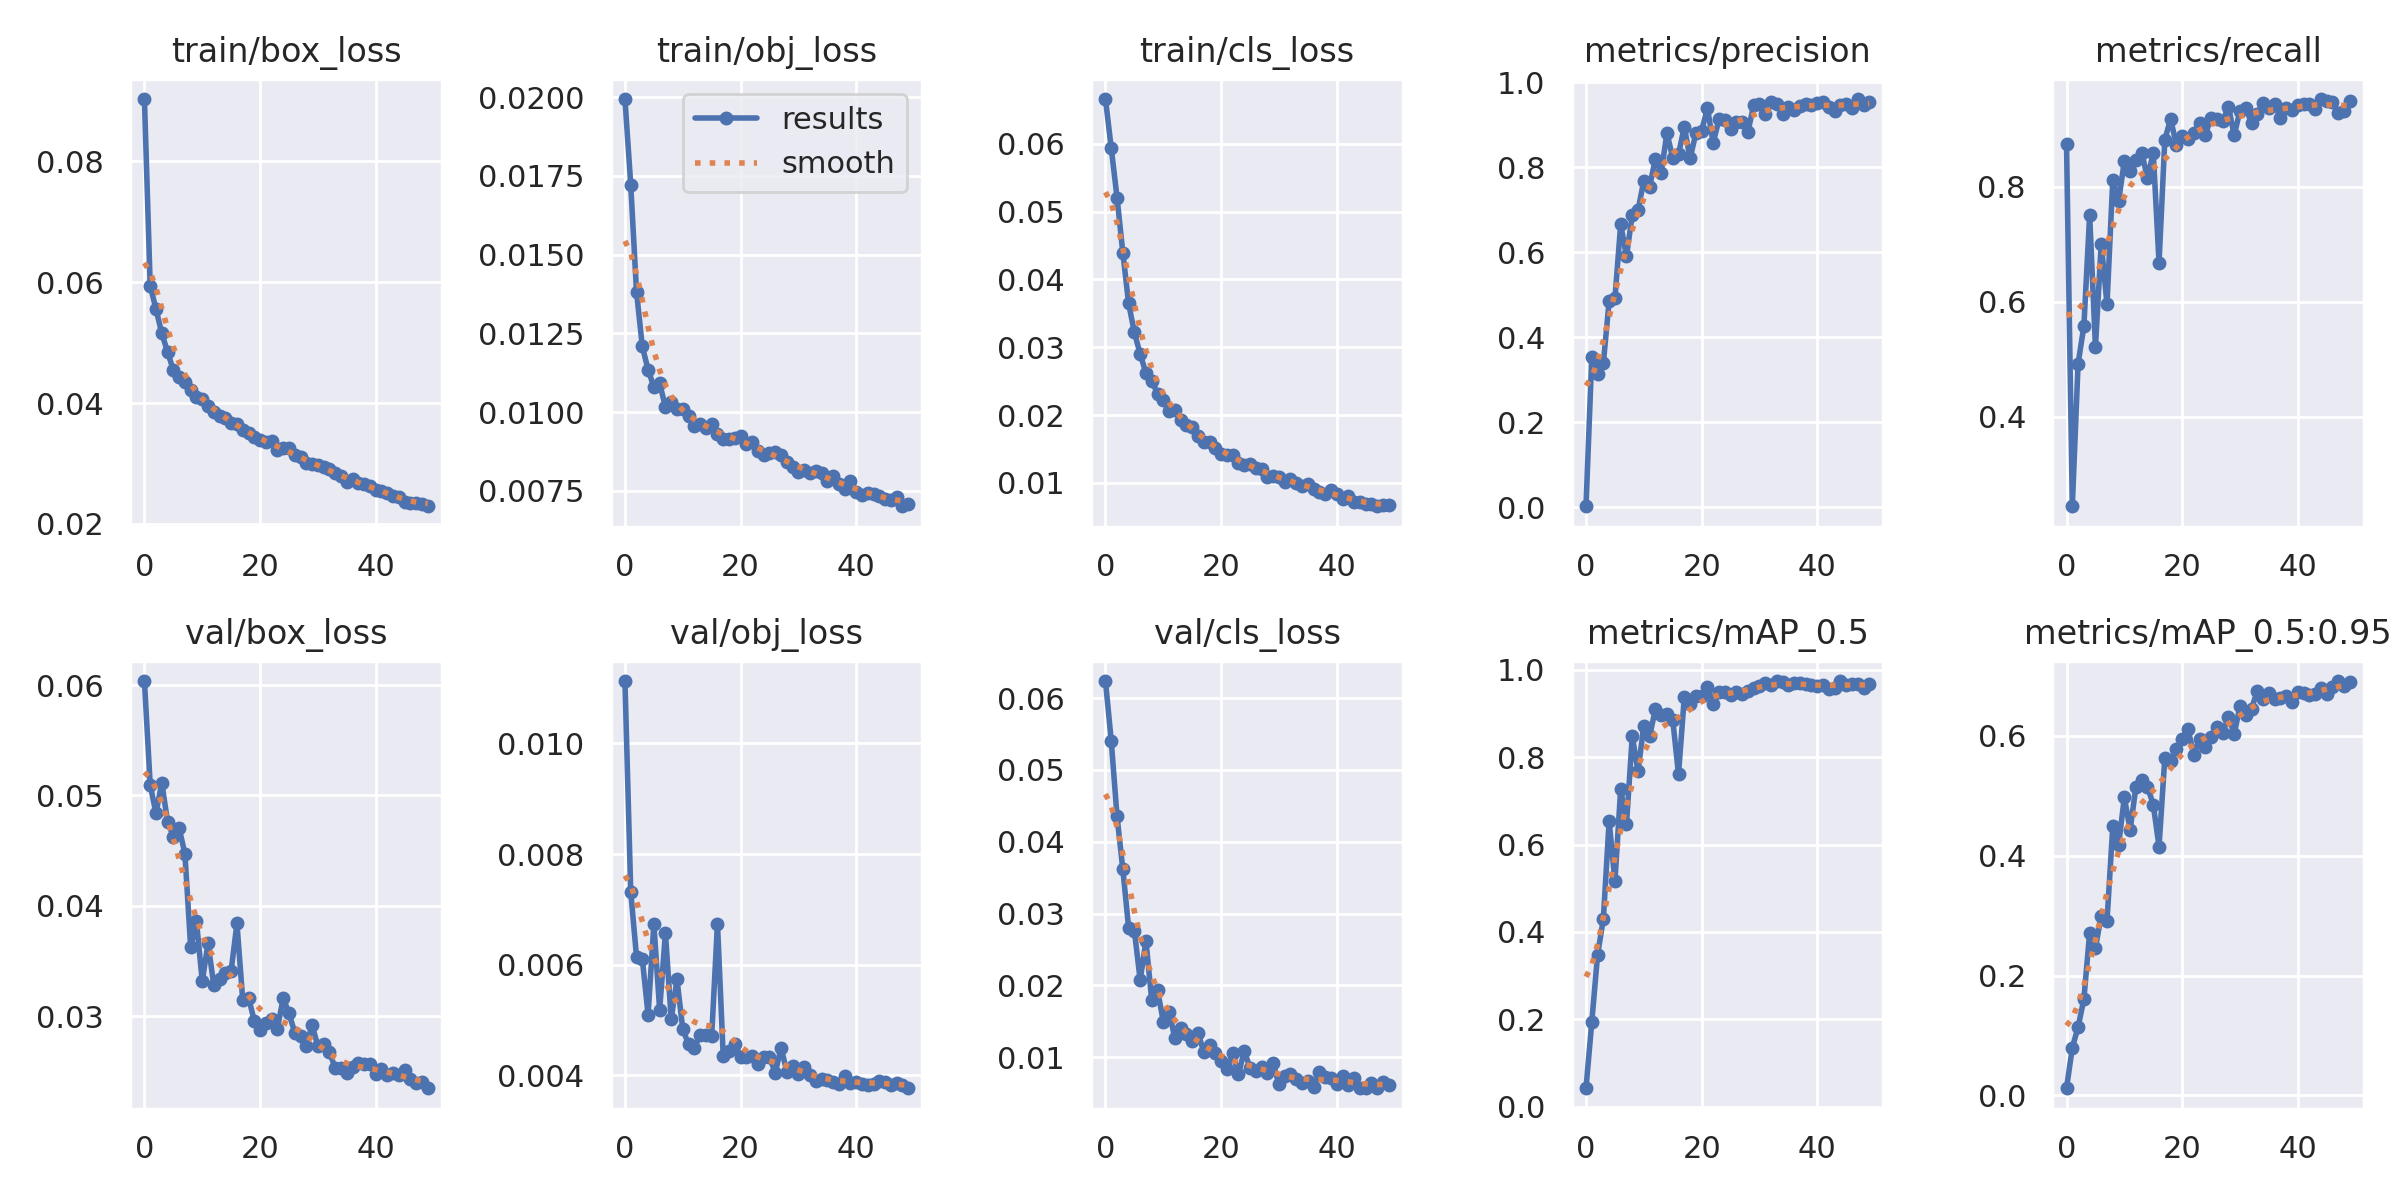

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)

**GROUND TRUTH AUGMENTED TRAINING DATA:**

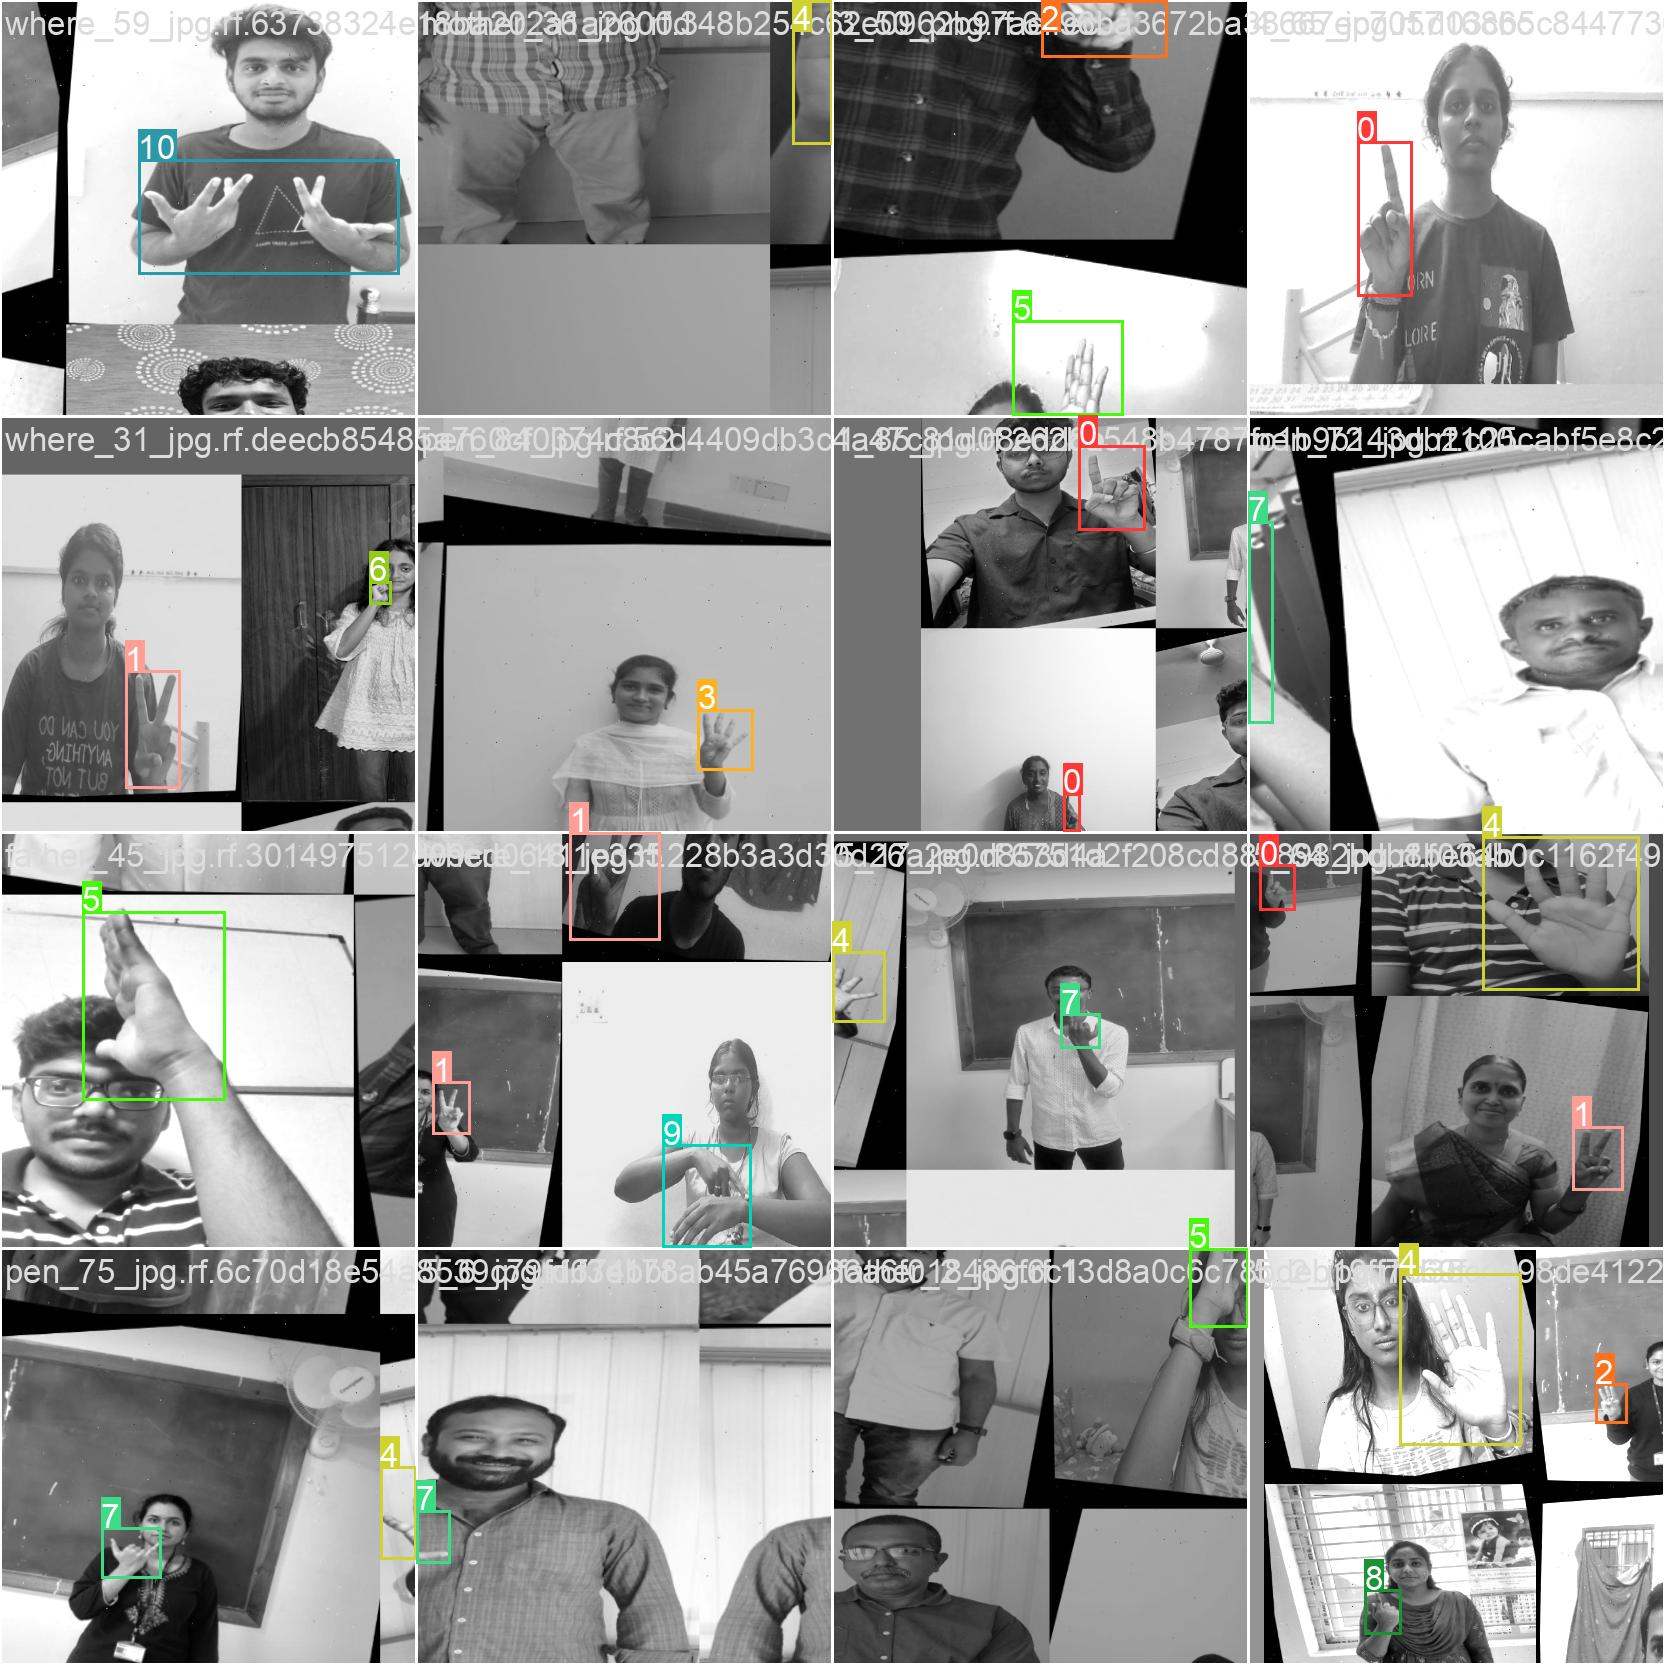

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=1000)

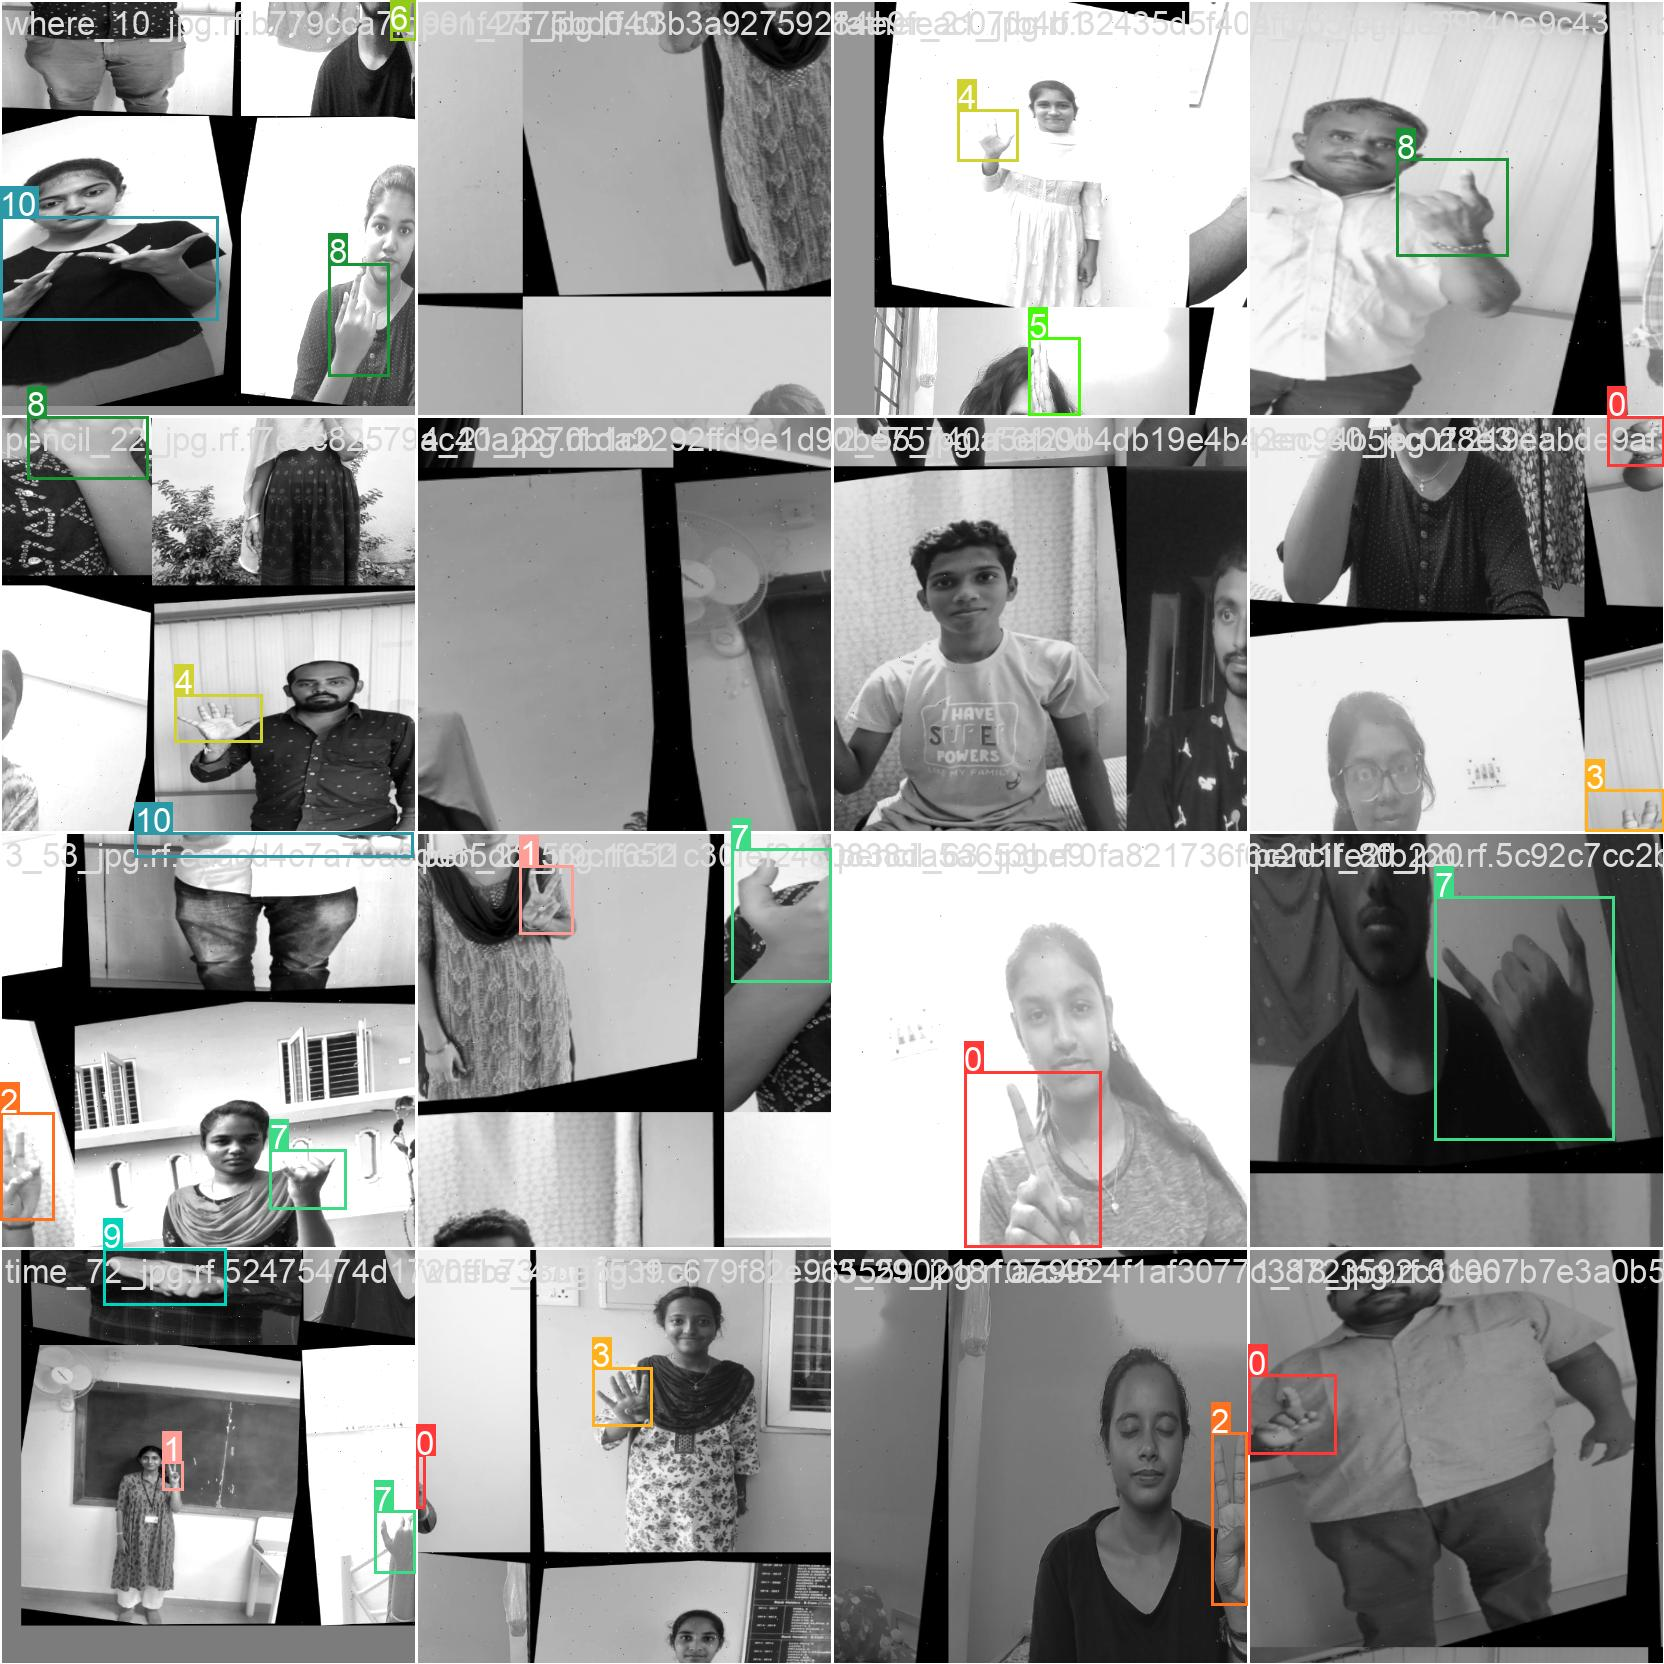

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/train_batch1.jpg', width=1000)

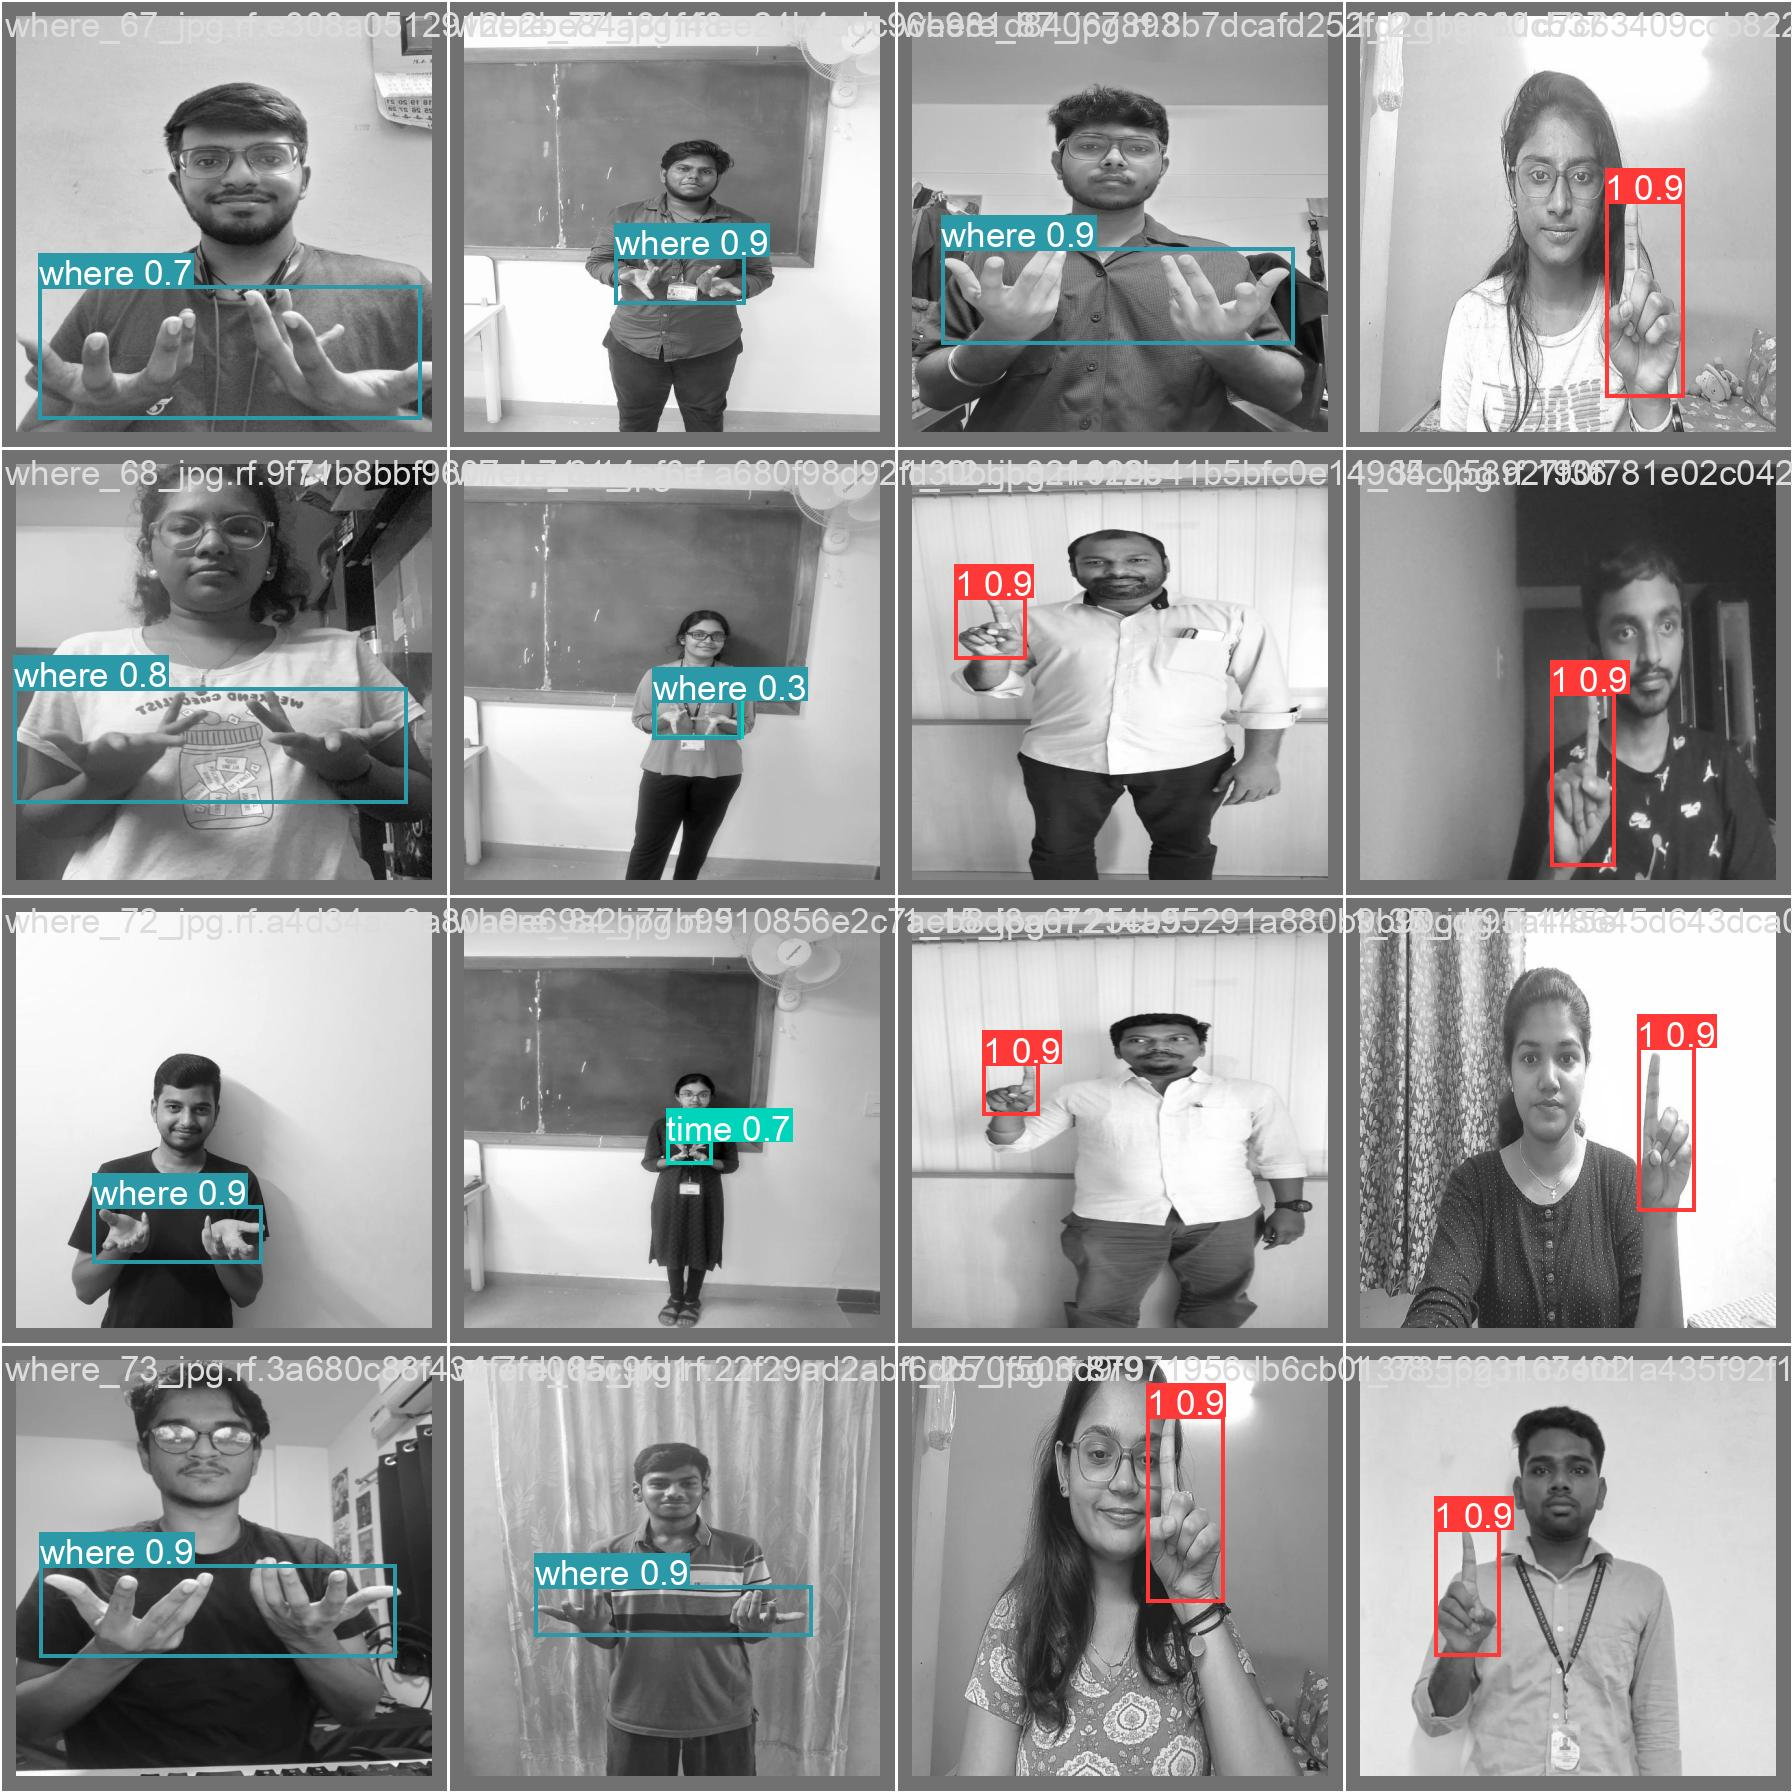

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch0_pred.jpg', width=900)

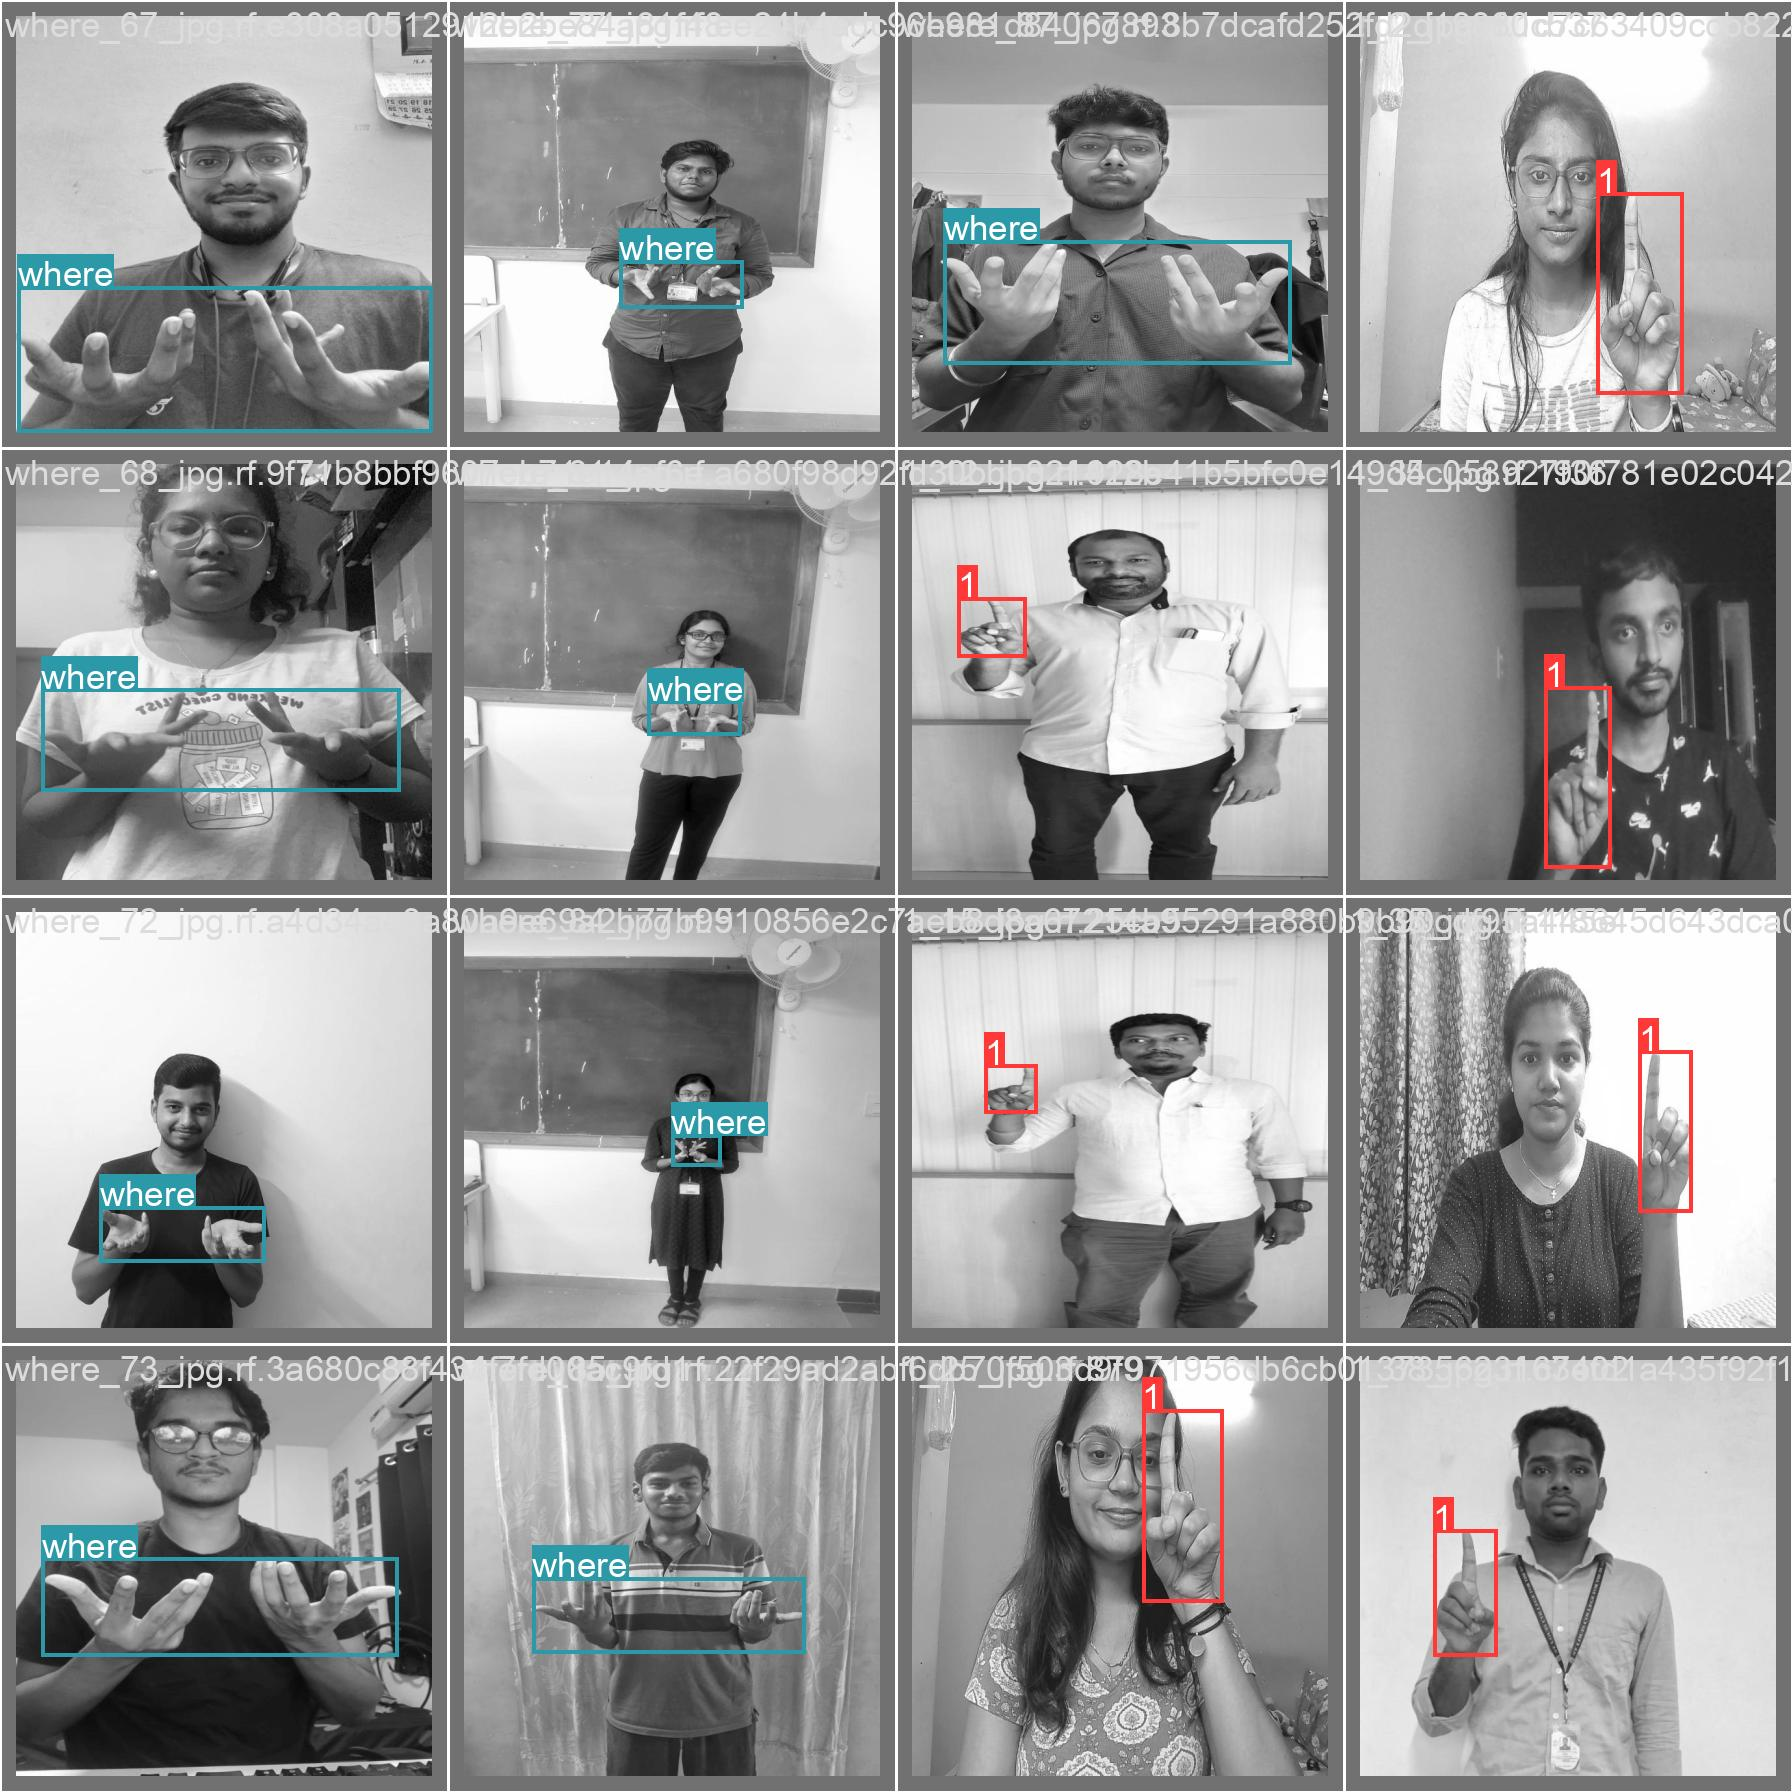

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg', width=900)

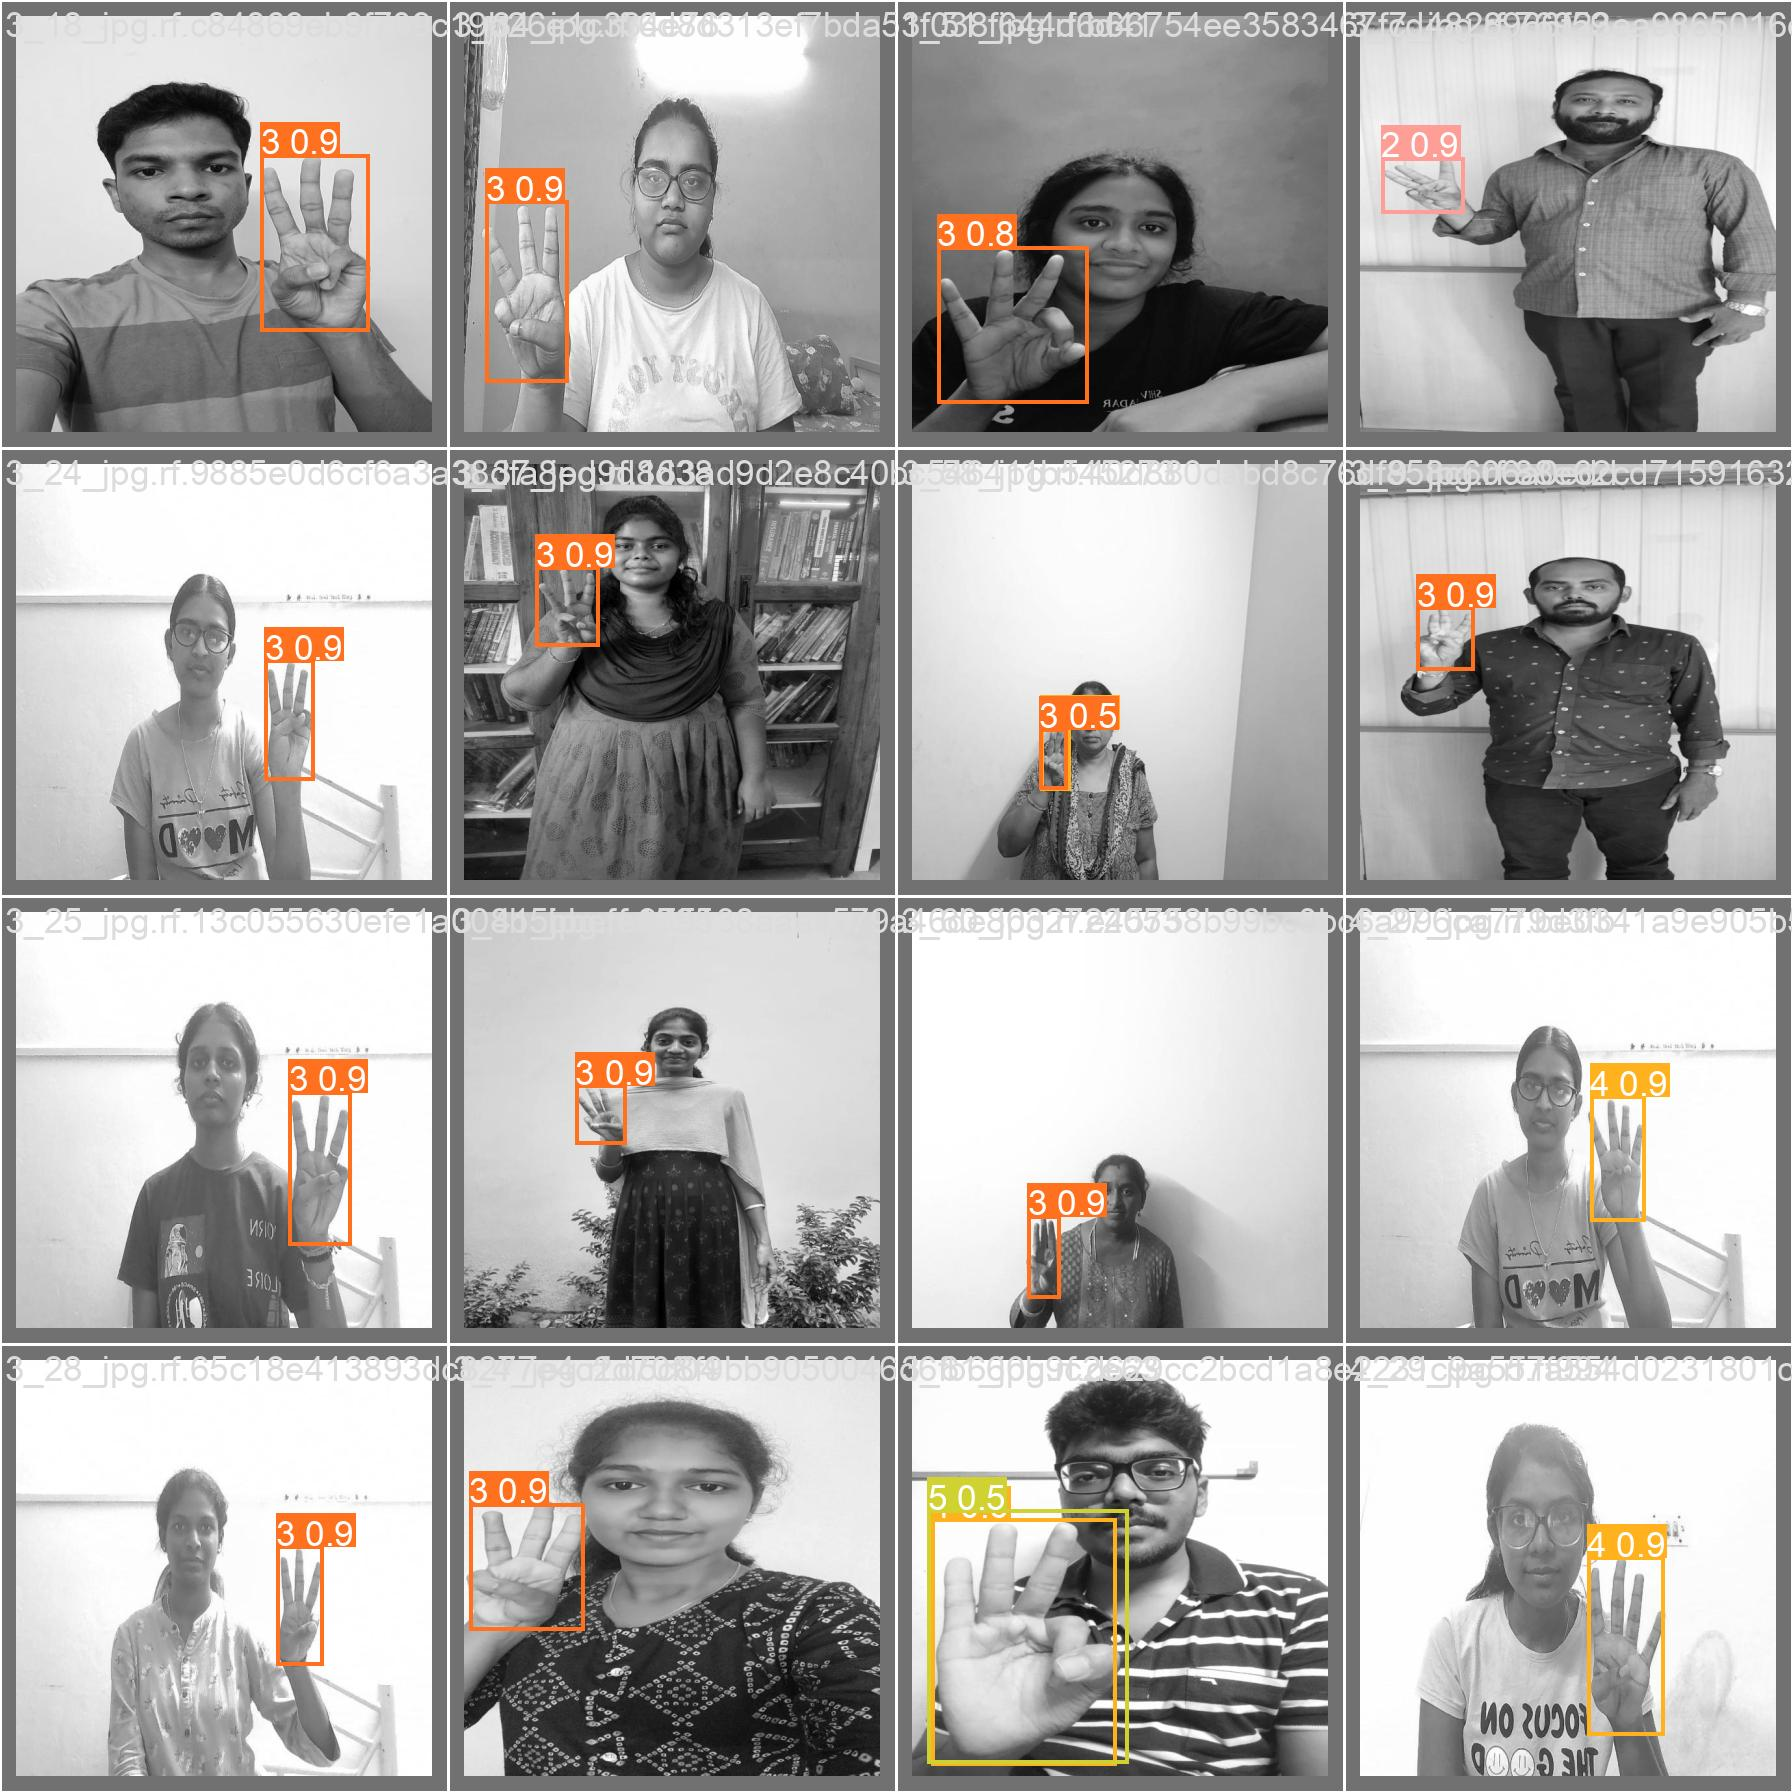

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch1_pred.jpg', width=900)

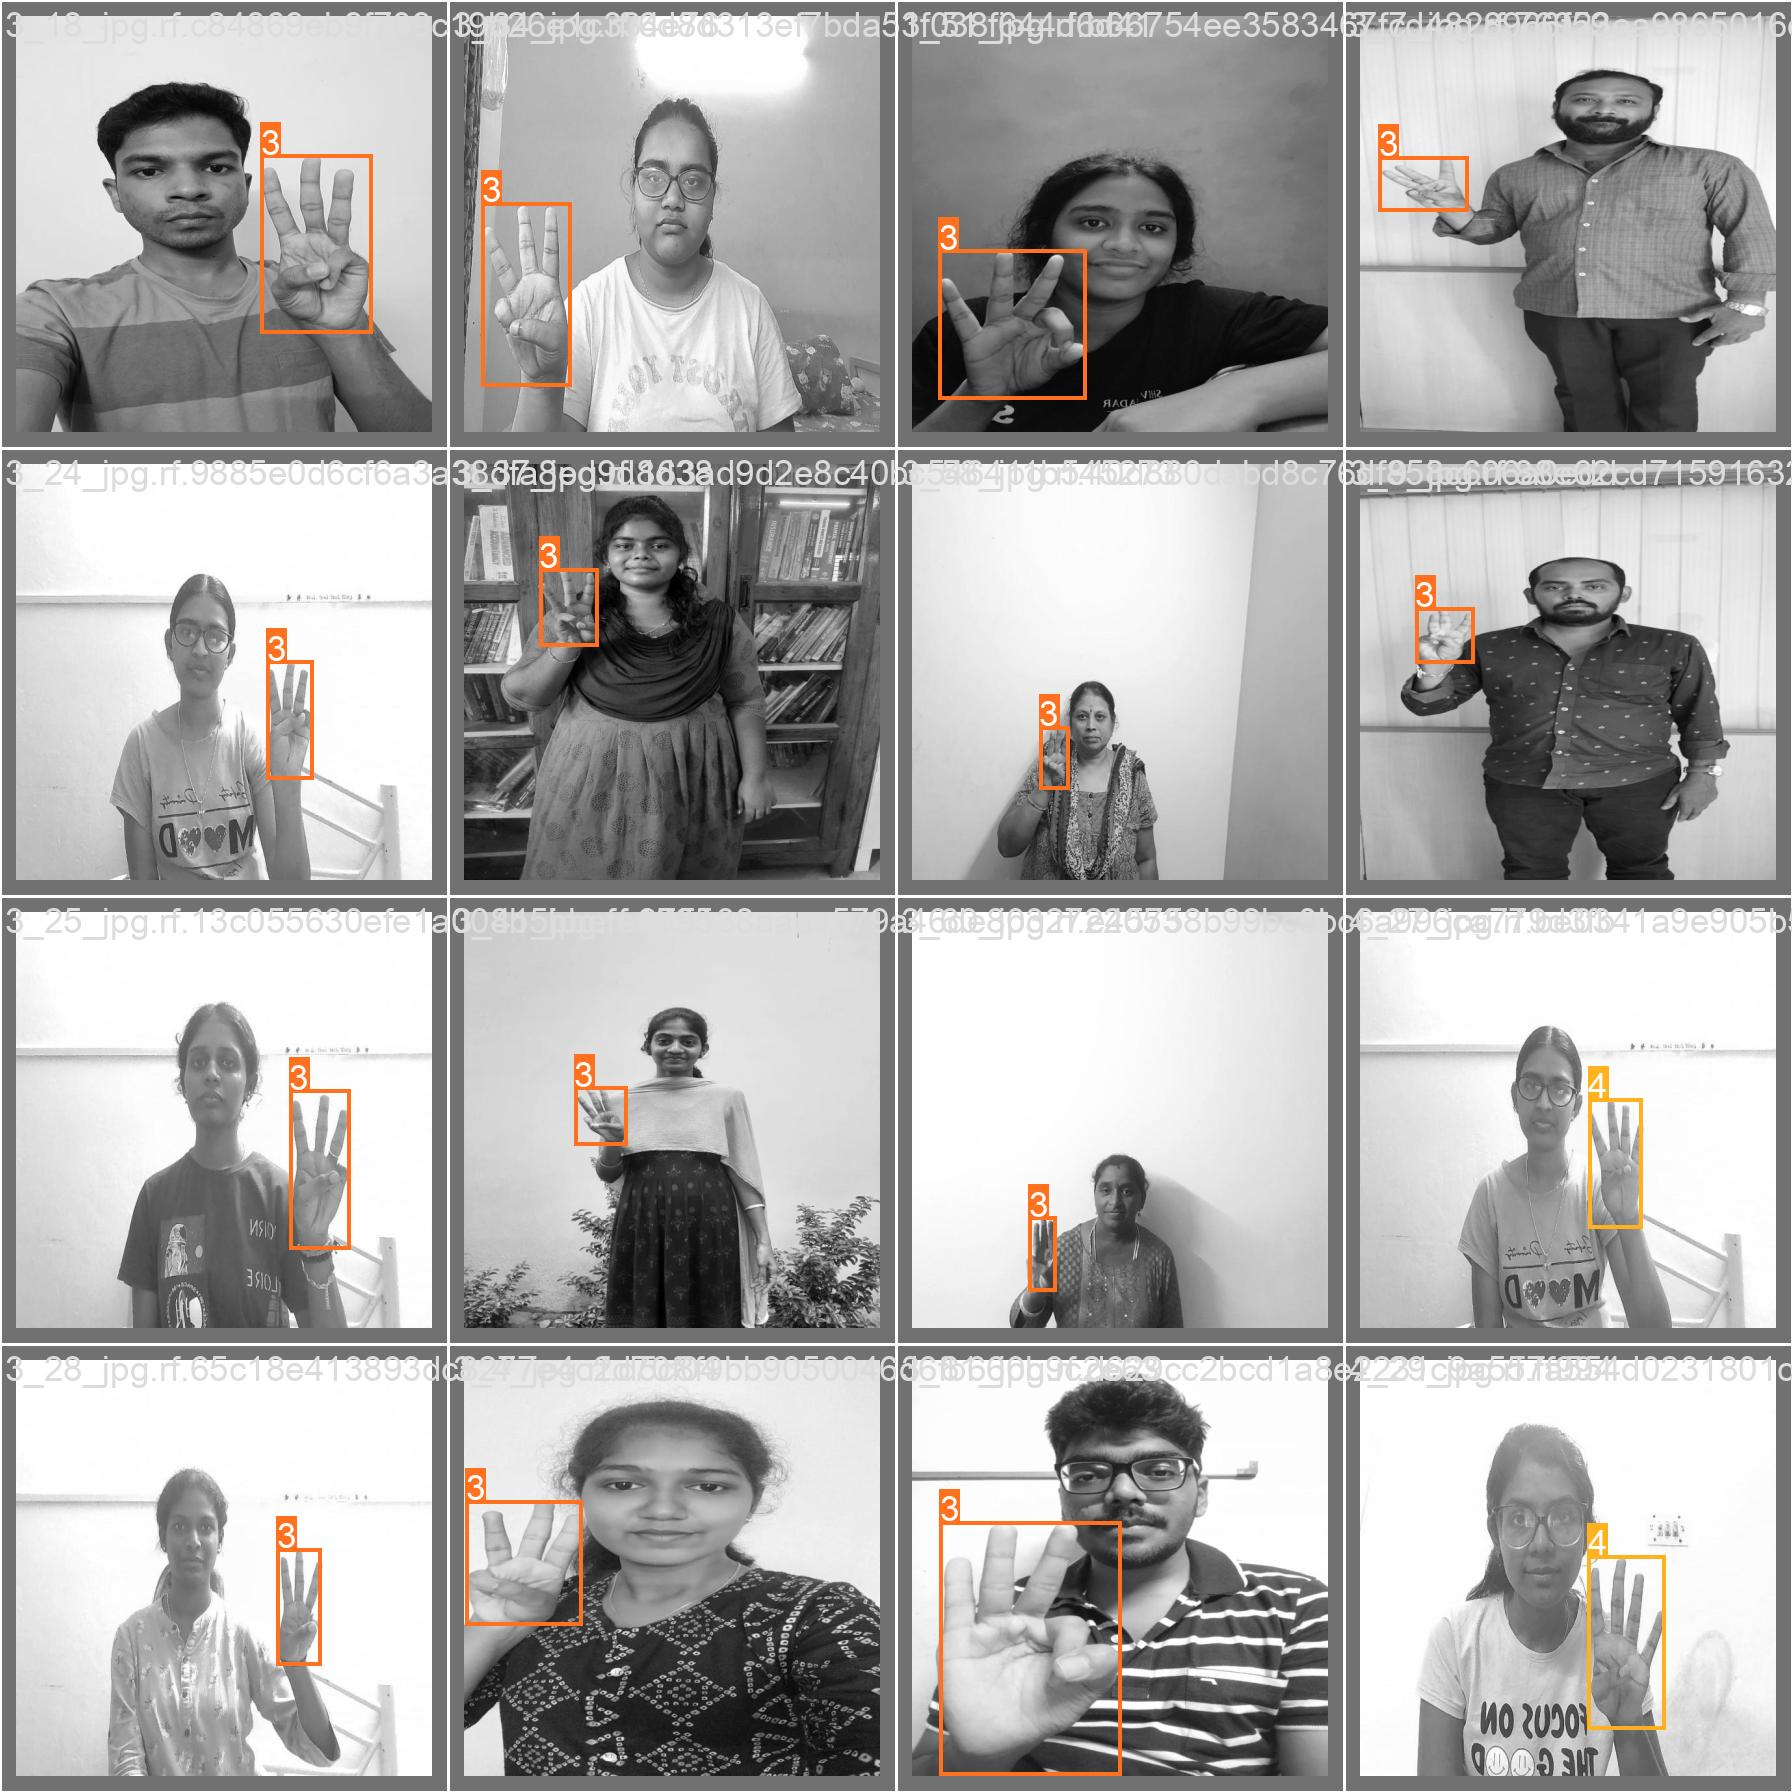

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch1_labels.jpg', width=900)

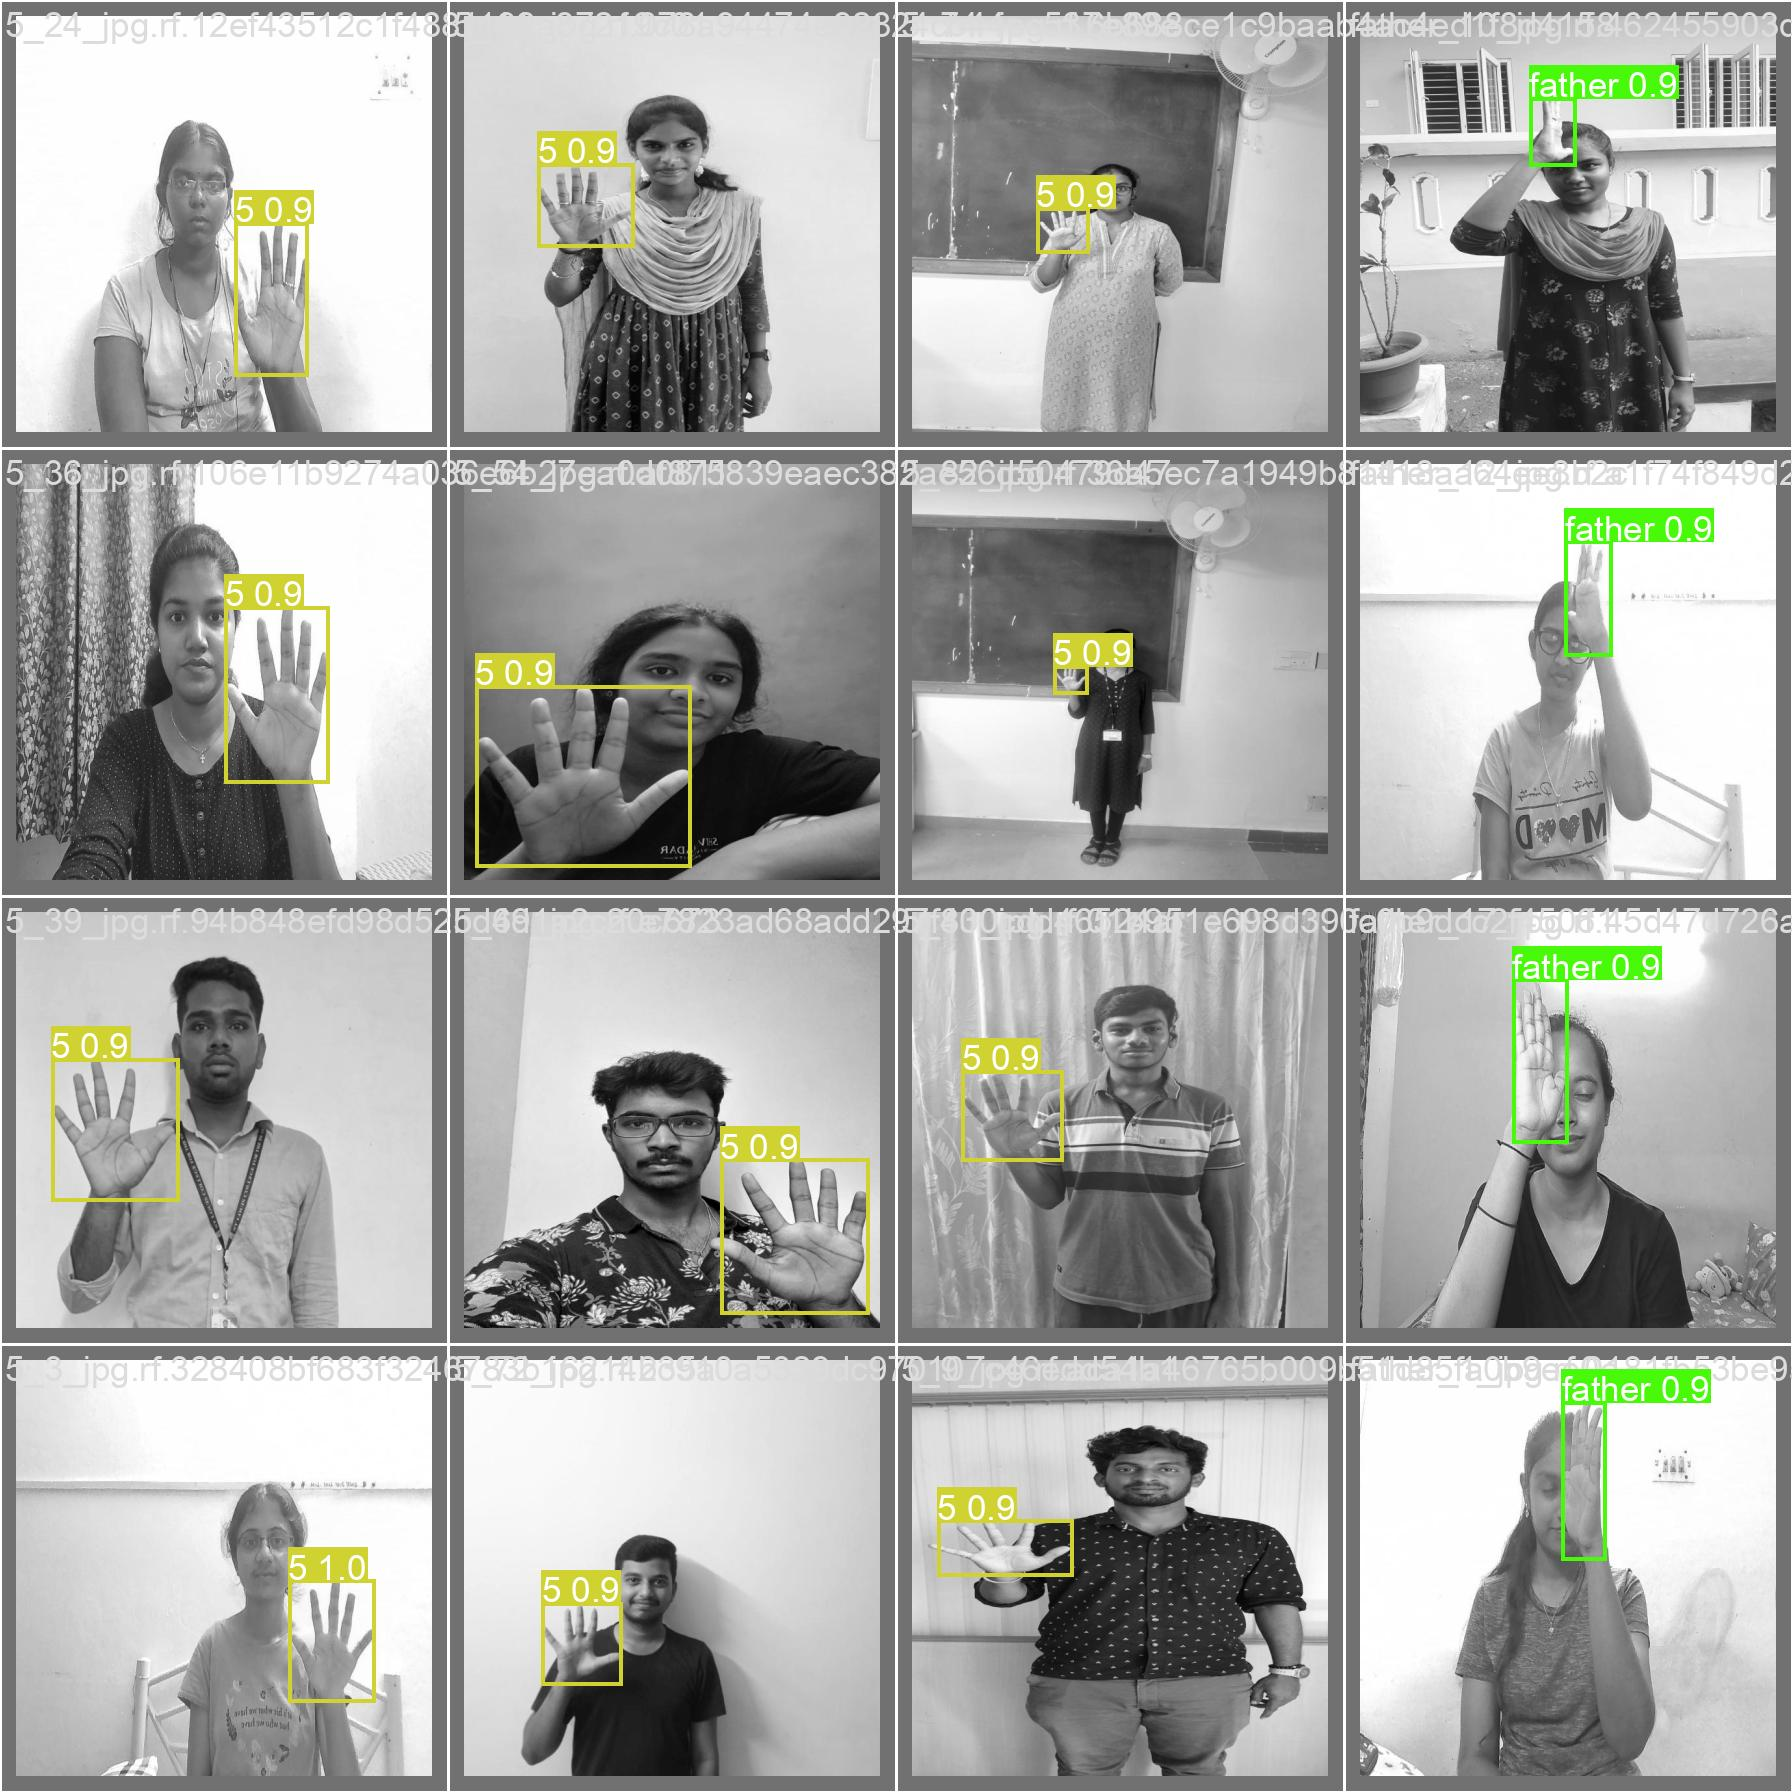

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch2_pred.jpg', width=900)

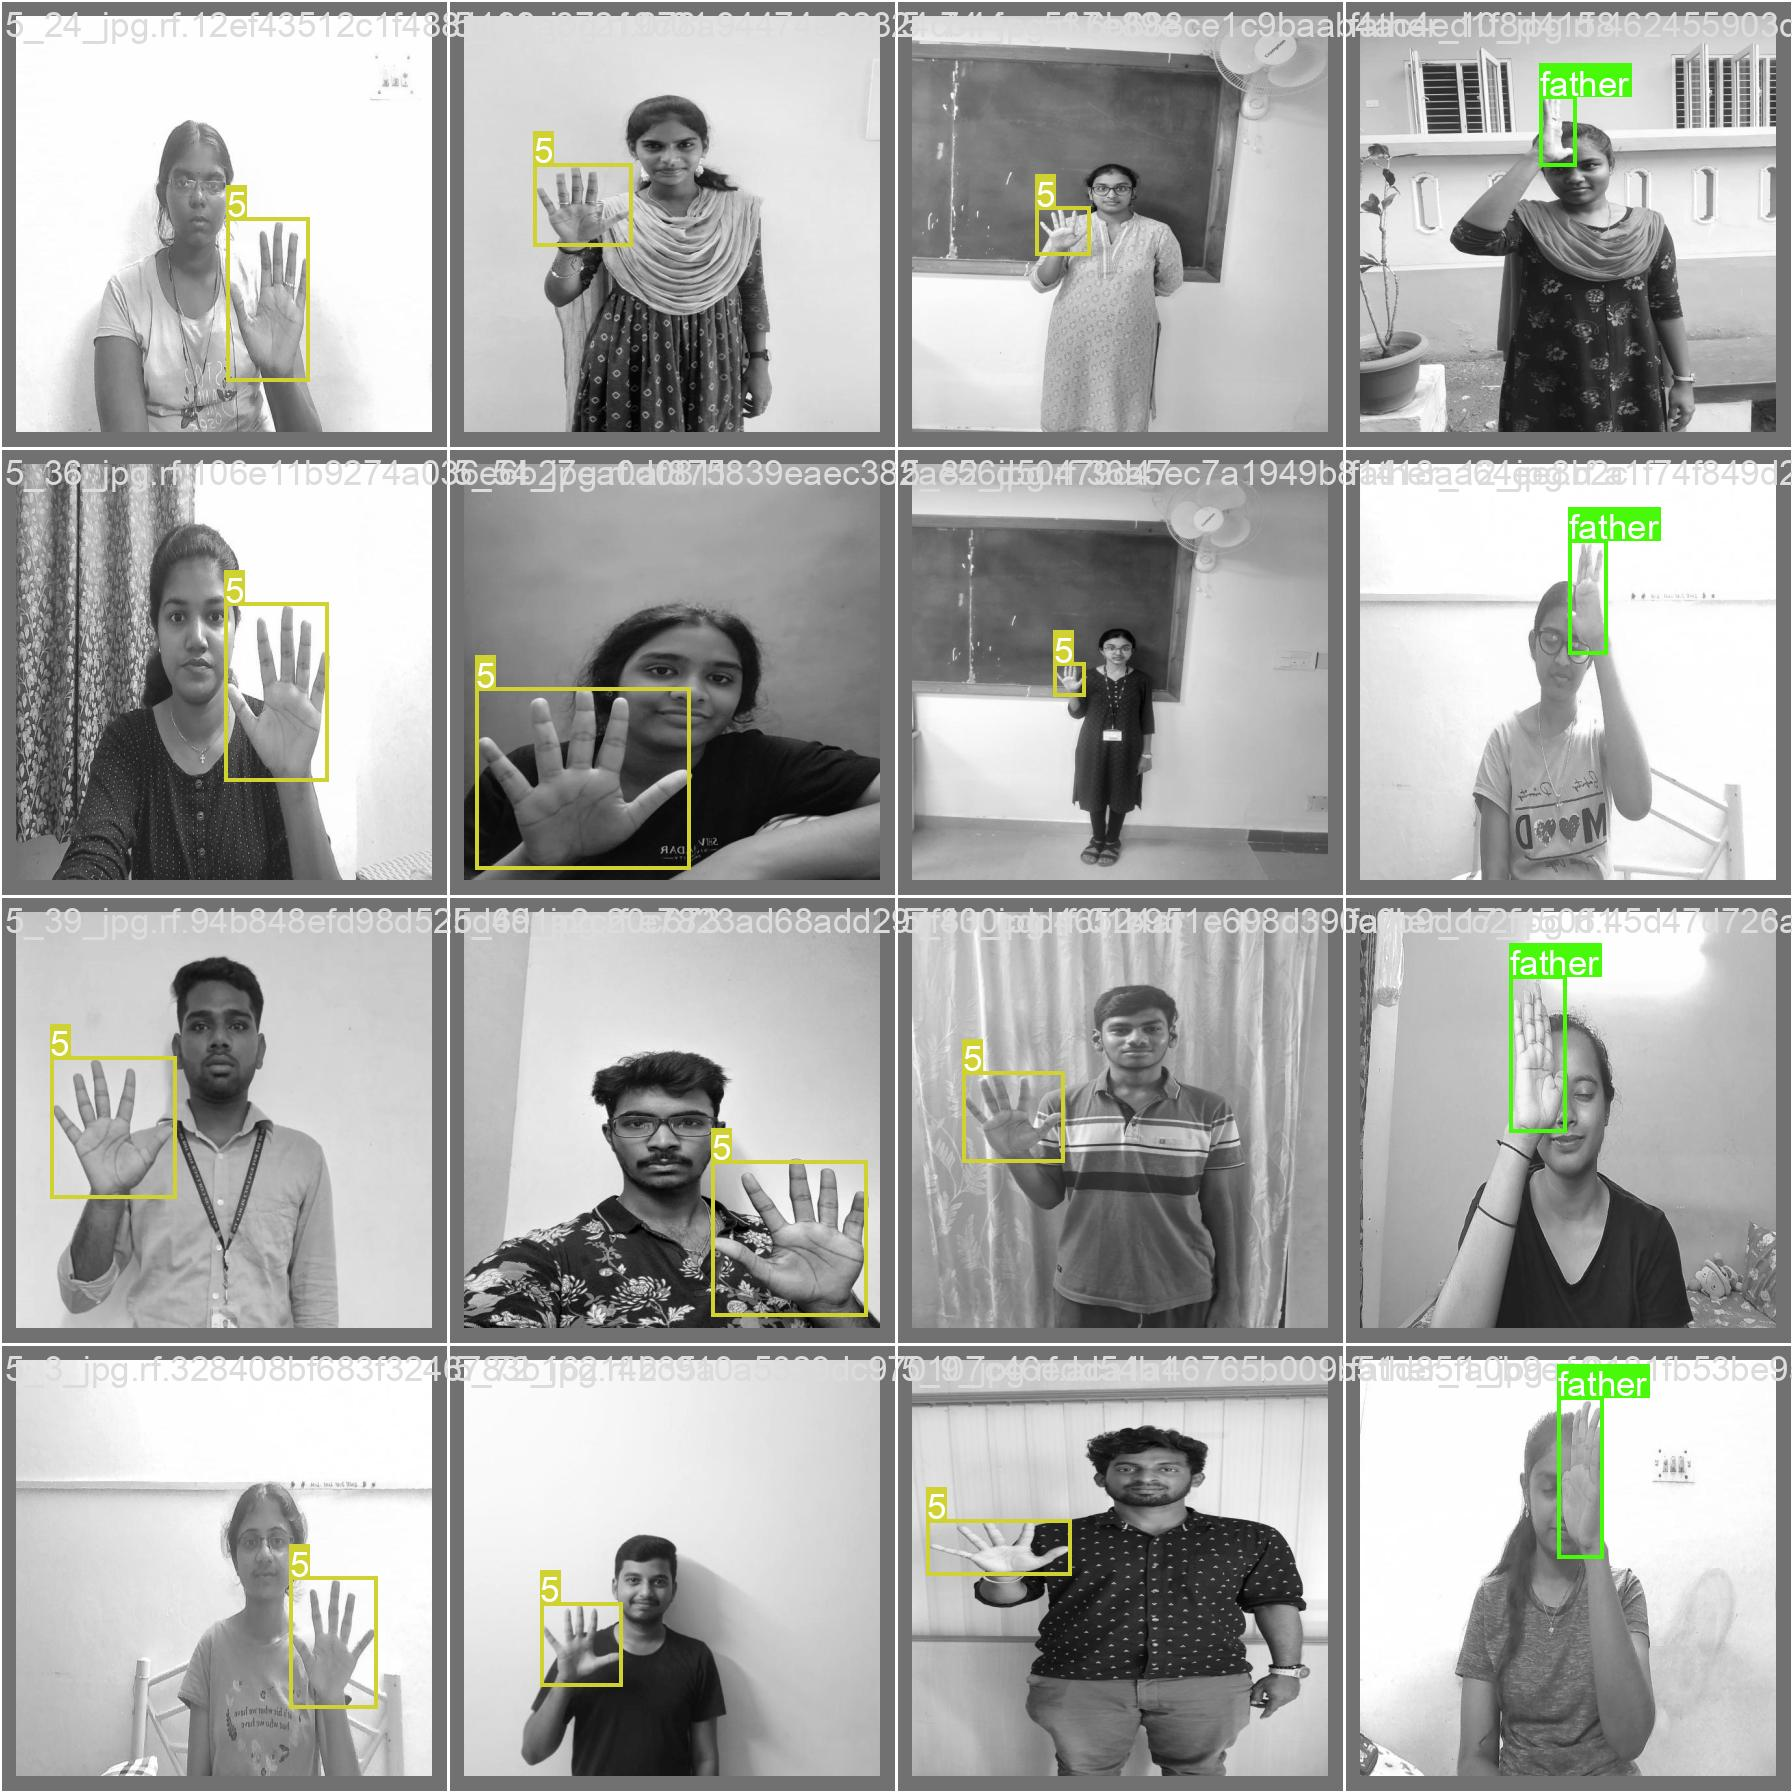

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch2_labels.jpg', width=900)

# Run Inference With Trained Weights

Next, we can run inference with a pretrained checkpoint on all images in the `test/images` folder to understand how our model performs on our test set.

In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [ ]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [ ]:
%ls runs/train/yolov5s_results

confusion_matrix.png                                PR_curve.png         val_batch0_labels.jpg
events.out.tfevents.1737057655.592bbb2d6d83.1659.0  R_curve.png          val_batch0_pred.jpg
F1_curve.png                                        results.csv          val_batch1_labels.jpg
hyp.yaml                                            results.png          val_batch1_pred.jpg
labels_correlogram.jpg                              roboflow_deploy.zip  val_batch2_labels.jpg
labels.jpg                                          state_dict.pt        val_batch2_pred.jpg
model_artifacts.json                                train_batch0.jpg     weights/
opt.yaml                                            train_batch1.jpg
P_curve.png                                         train_batch2.jpg


In [ ]:
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.35 --source {dataset.location}/test/images/

/content/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/content/yolov5/SignLanguagePrediction-2/test/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7039792 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/93 /content/yolov5/SignLanguagePrediction-2/test/images/1_13_jpg.rf.a9867e2b4c8bab5d3809e0c756602ece.jpg: 416x416 1 1, 8.3ms
image 2/93 /content/yolov5/SignLanguagePrediction-2/test/images/1_21_jpg.rf.c

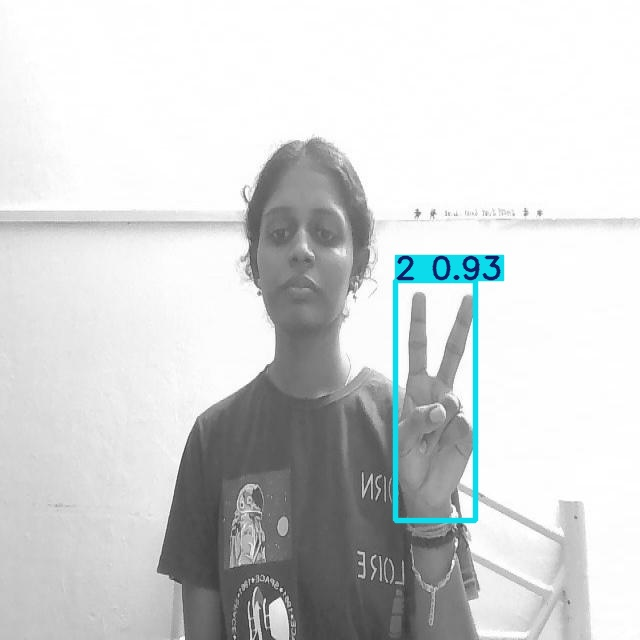

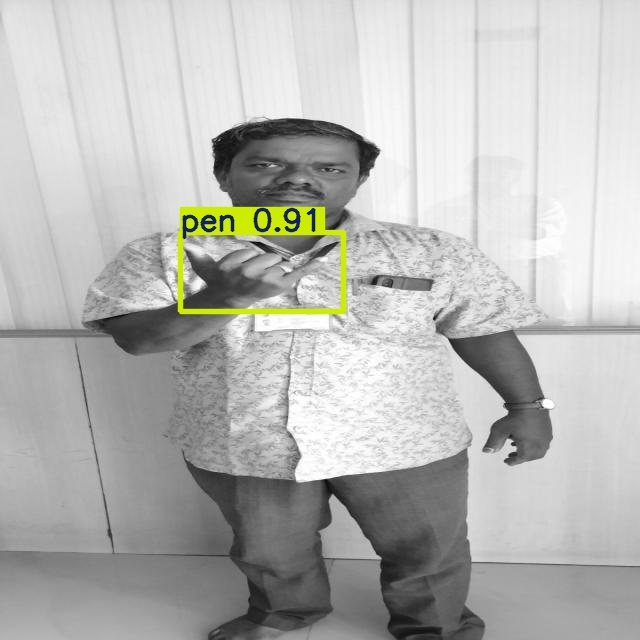

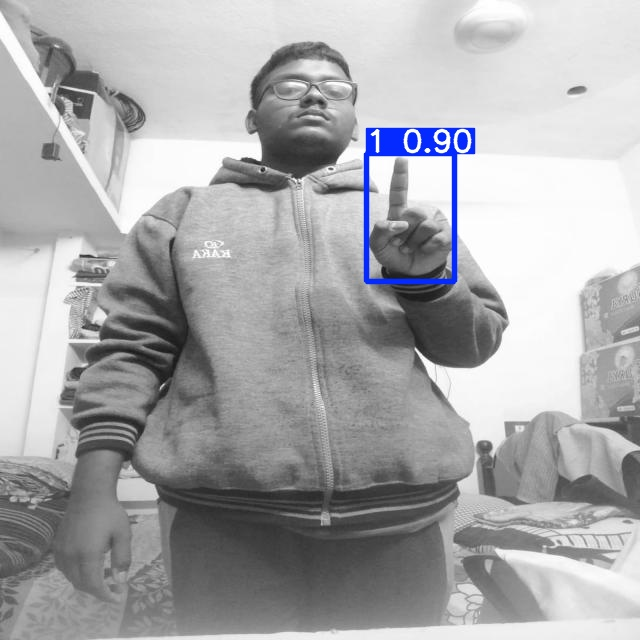

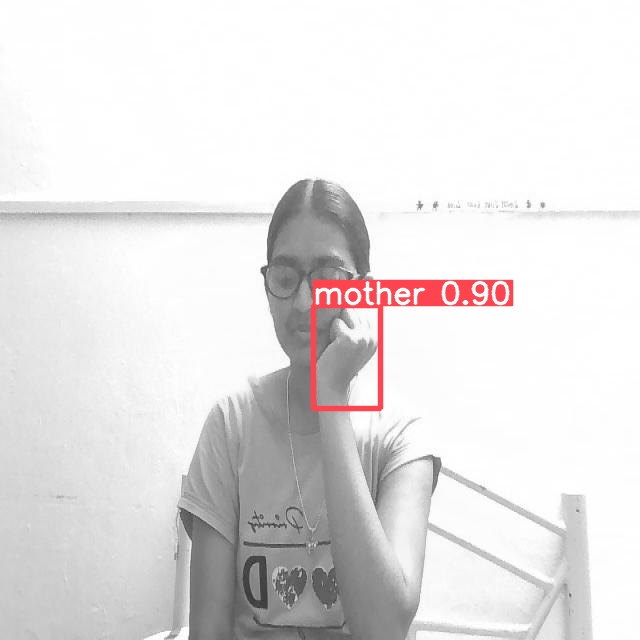

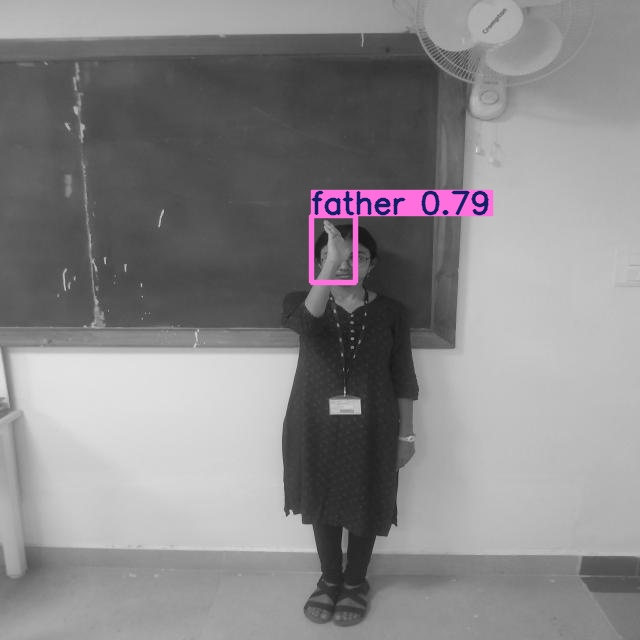

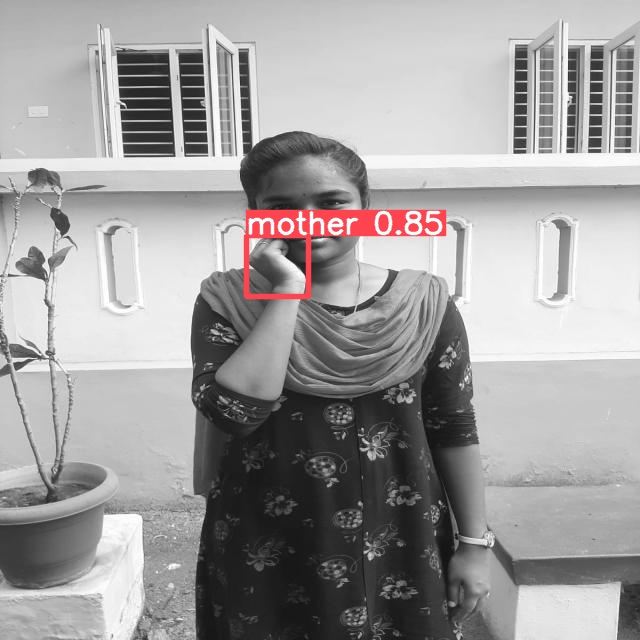

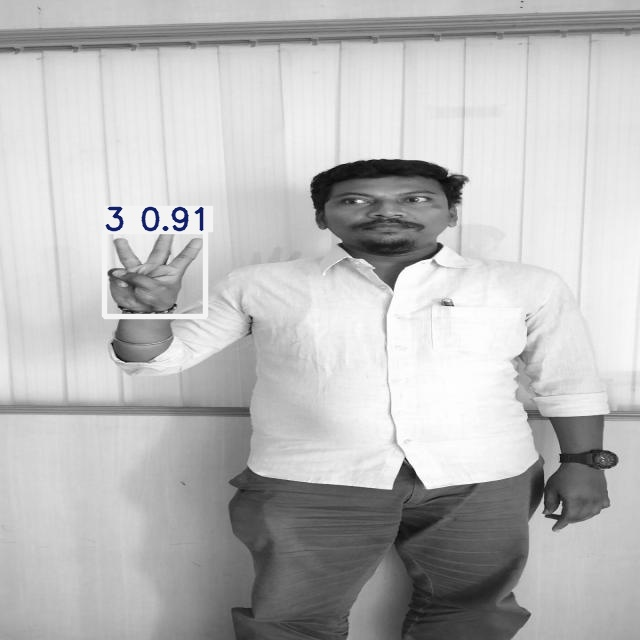

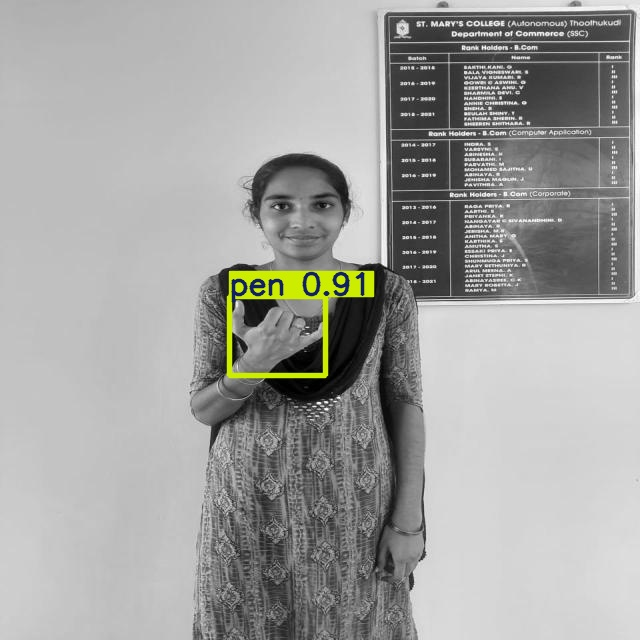

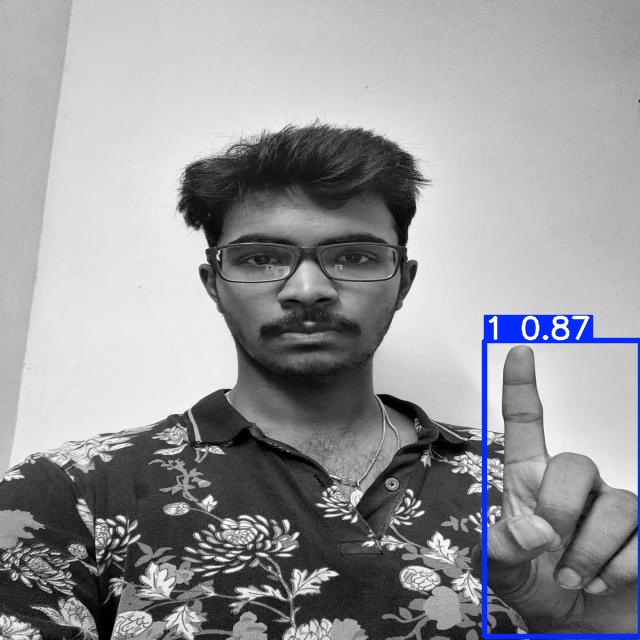

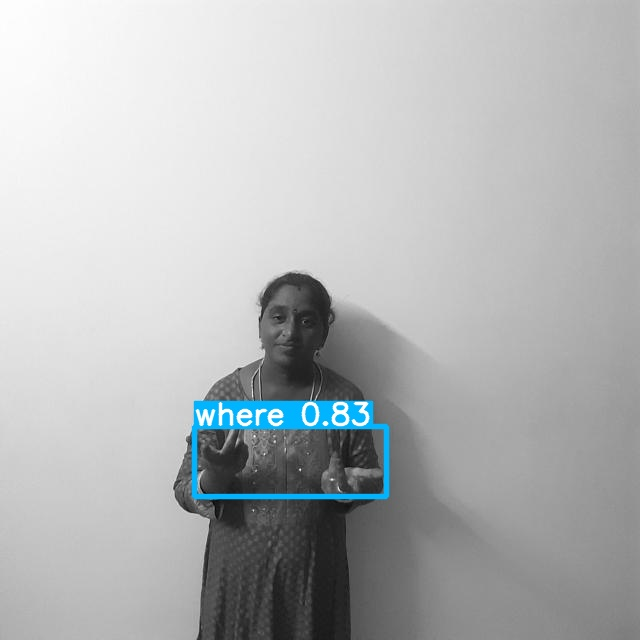

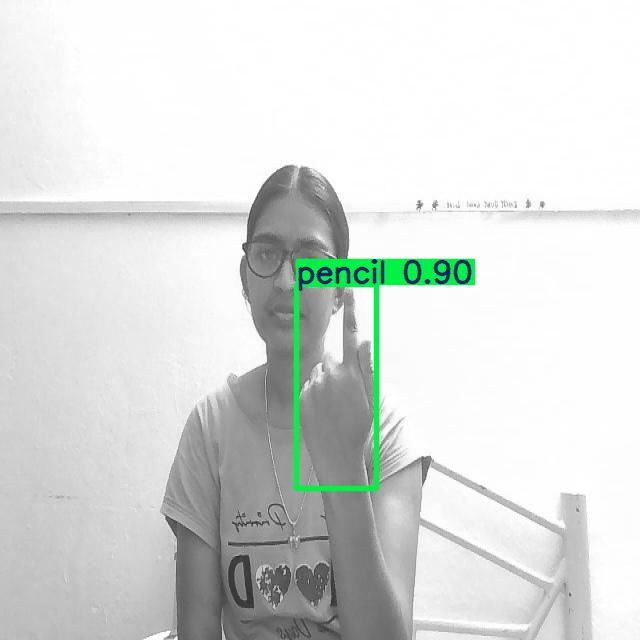

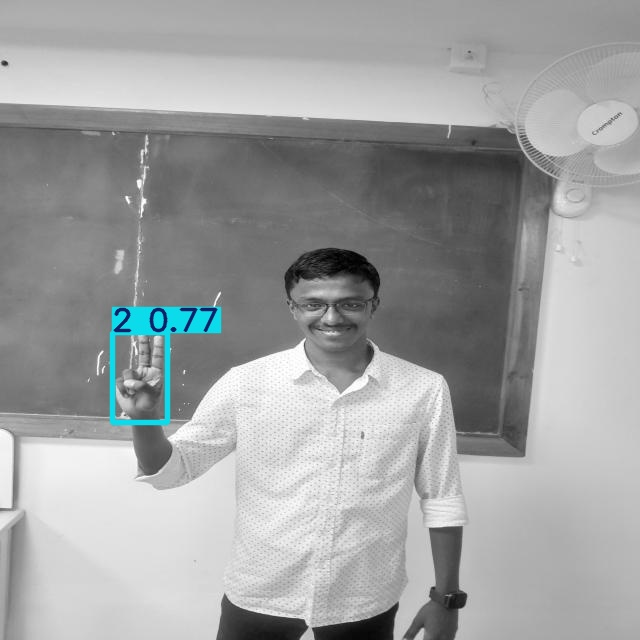

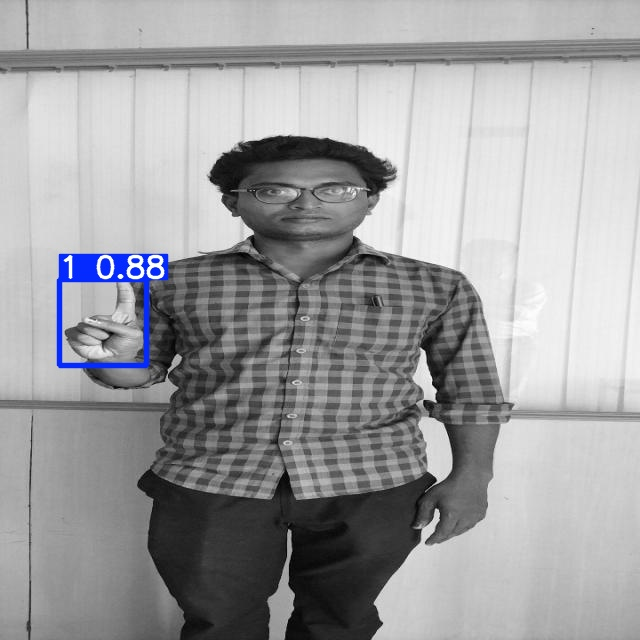

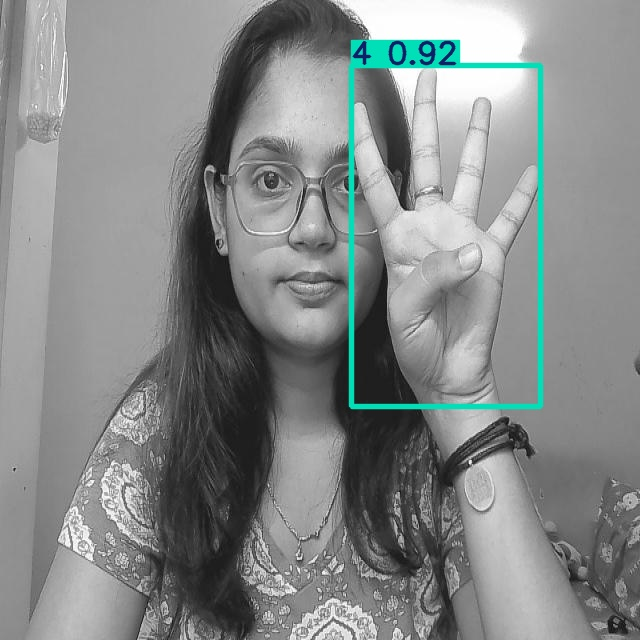

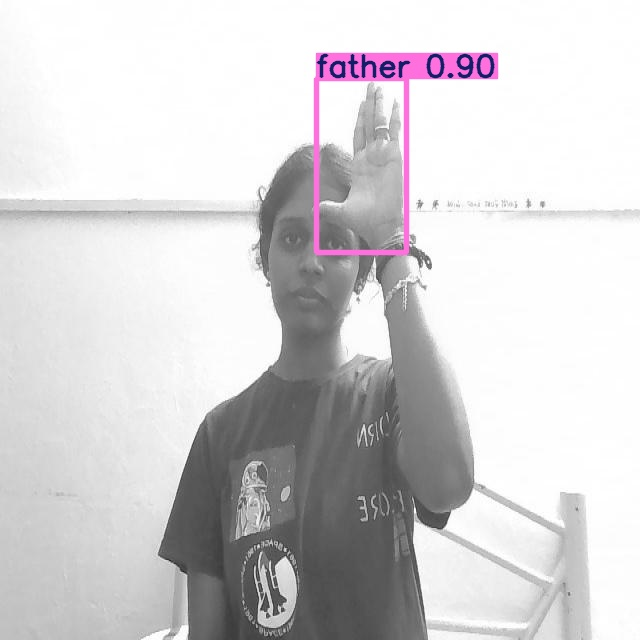

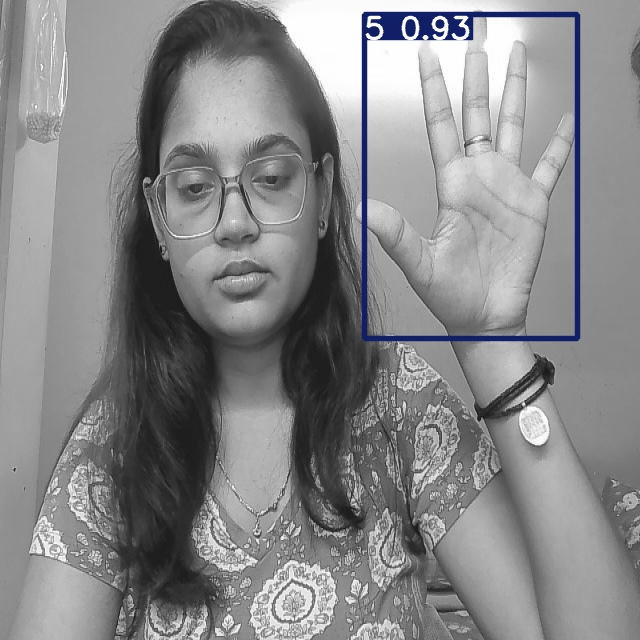

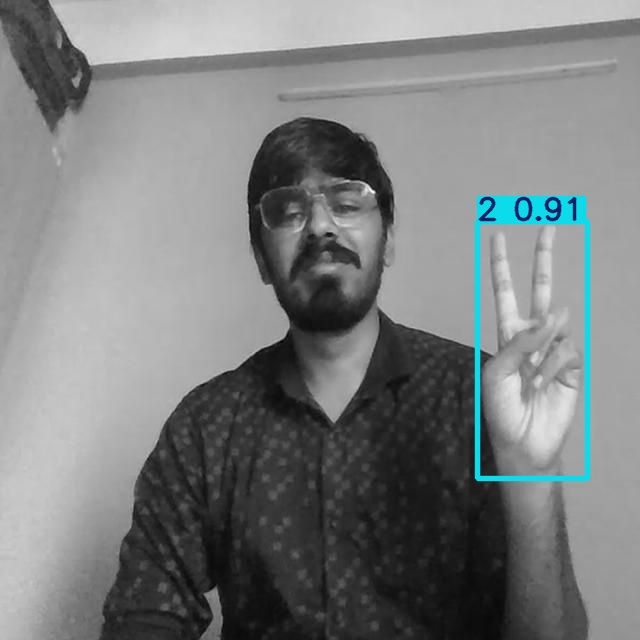

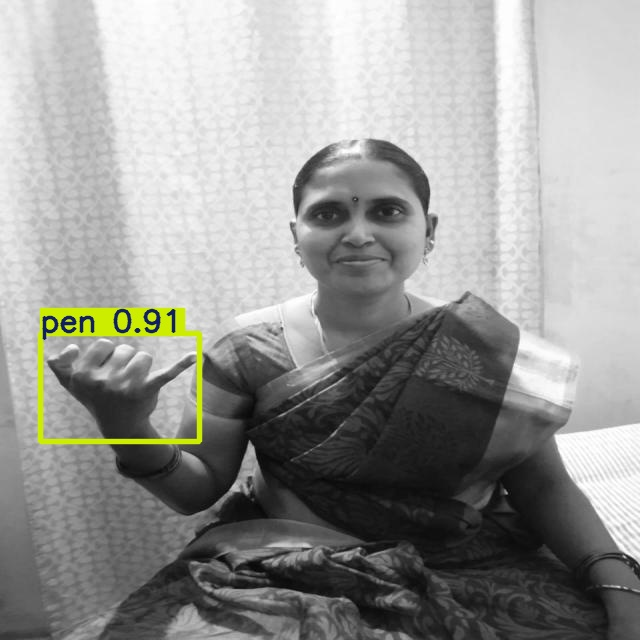

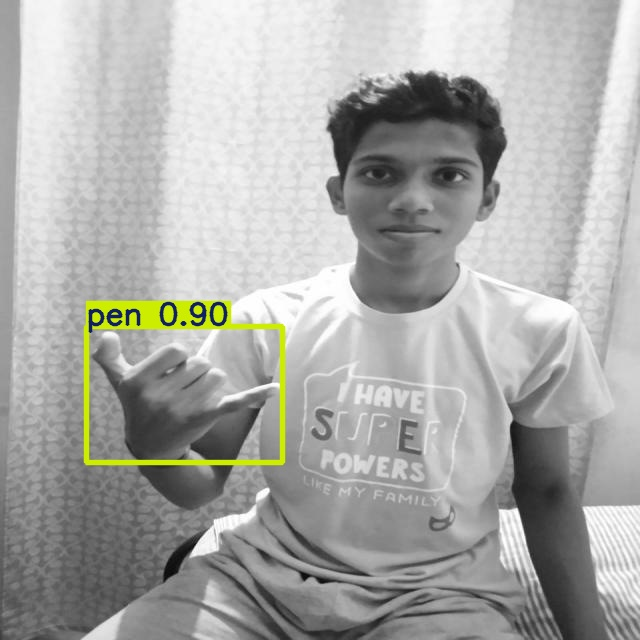

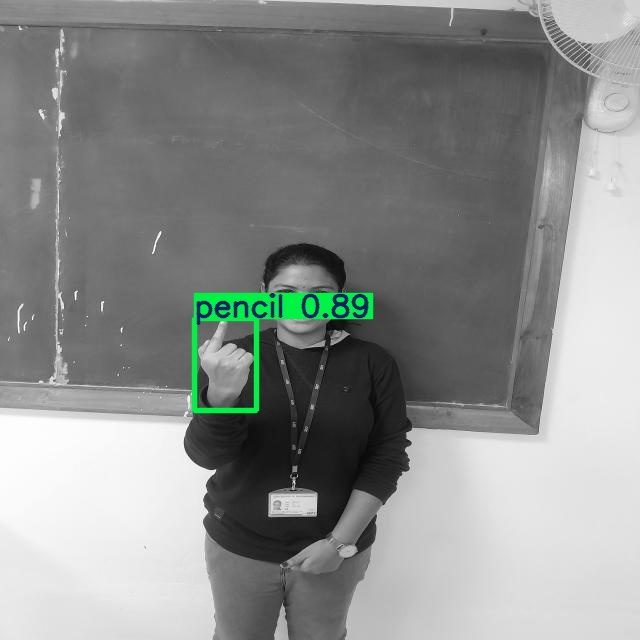

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg')[:20]: #assuming JPG
    display(Image(filename=imageName))

## Deploy Model on Roboflow

Once you have finished training your YOLOv5 model, you’ll have a set of trained weights ready for use. These weights will be in the `/content/yolov5/runs/train/yolov5s_results/` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv5 weights.

**Before you run this code, make sure you create a new Version in the Roboflow dashboard following the instructions we covered earlier. Fill in your project name, workspace, and version number below.**

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov5", model_path=f"/content/yolov5/runs/train/yolov5s_results/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on time_15_jpg.rf.fdbef36f50545b98c2997bec0a1d0945.jpg


{'predictions': [{'x': 461.5,
   'y': 468.0,
   'width': 327.0,
   'height': 158.0,
   'confidence': 0.9046181440353394,
   'class': 'time',
   'class_id': 9,
   'detection_id': 'f3f226c7-5302-4858-8f48-e2255e89b336',
   'image_path': '/content/yolov5/SignLanguagePrediction-2/test/images/time_15_jpg.rf.fdbef36f50545b98c2997bec0a1d0945.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}